<a href="https://colab.research.google.com/github/Henrymnt/IdentificationofKeyModeStyle/blob/main/IdentificationofKeyModeStyle_Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Import Dependencies/Libraries
!pip3 install mido
import mido, collections
import math, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import pickle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.0 MB/s eta 0:00:00


In [2]:
#@title Reading Dataset
!git clone https://github.com/Henrymnt/sf_data_2025
piece_data = pd.read_csv("/content/sf_data_2025/piece_data_full.csv")
labels = ['A','Bb','B','C','C#','D','Eb','E','F','F#','G','Ab']

Cloning into 'sf_data_2025'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 4.10 MiB | 4.83 MiB/s, done.


In [ ]:
#@title Data Augmentation (Key)
i=0
piece_data_addition=[]
shuffled_data = piece_data.sample(frac=1)
for frequency in piece_data.key.value_counts():
  current_key = piece_data.key.value_counts().index[i]
  current_frequency=frequency
  while current_frequency <= 800:
    for j in range(0,len(shuffled_data)):
      current_row = shuffled_data.iloc[j]
      # print(current_row)

      if current_row["key"] == current_key:
        print(current_key, current_frequency)
        new_row = current_row.copy()

        keys = list(new_row.keys())
        for k in range(0,len(new_row)):
          if keys[k] != "name" and keys[k] != "path" and keys[k] != "key" and keys[k] != "mode" and keys[k] != "style":
              new_row[keys[k]] += np.random.normal(0, (0.1*new_row[keys[k]]))

        new_row["name"]=new_row["name"] + " (Augmented)"
        new_row["path"]="N/A (This piece of data was augmented)"
        # new_row = new_row.transpose()
        piece_data_addition.append(new_row)
        # print(piece_data_addition)
        current_frequency+=1
      if current_frequency > 800:
        break

  i+=1
piece_data_addition = pd.DataFrame(piece_data_addition)
piece_data.key.value_counts().plot(kind = 'bar')
piece_data_key = pd.concat([piece_data, piece_data_addition], ignore_index=True)
piece_data_key.key.value_counts().plot(kind = 'bar')
# piece_data.describe()
# style_data = pd.Series(piece_data["style"]).value_counts()
# piece_data.key.value_counts().plot(kind = 'bar')
# print(piece_data.key.value_counts().index)

C 731
C 732
C 733
C 734
C 735
C 736
C 737
C 738
C 739
C 740
C 741
C 742
C 743
C 744
C 745
C 746
C 747
C 748
C 749
C 750
C 751
C 752
C 753
C 754
C 755
C 756
C 757
C 758
C 759
C 760
C 761
C 762
C 763
C 764
C 765
C 766
C 767
C 768
C 769
C 770
C 771
C 772
C 773
C 774
C 775
C 776
C 777
C 778
C 779
C 780
C 781
C 782
C 783
C 784
C 785
C 786
C 787
C 788
C 789
C 790
C 791
C 792
C 793
C 794
C 795
C 796
C 797
C 798
C 799
C 800
F 607
F 608
F 609
F 610
F 611
F 612
F 613
F 614
F 615
F 616
F 617
F 618
F 619
F 620
F 621
F 622
F 623
F 624
F 625
F 626
F 627
F 628
F 629
F 630
F 631
F 632
F 633
F 634
F 635
F 636
F 637
F 638
F 639
F 640
F 641
F 642
F 643
F 644
F 645
F 646
F 647
F 648
F 649
F 650
F 651
F 652
F 653
F 654
F 655
F 656
F 657
F 658
F 659
F 660
F 661
F 662
F 663
F 664
F 665
F 666
F 667
F 668
F 669
F 670
F 671
F 672
F 673
F 674
F 675
F 676
F 677
F 678
F 679
F 680
F 681
F 682
F 683
F 684
F 685
F 686
F 687
F 688
F 689
F 690
F 691
F 692
F 693
F 694
F 695
F 696
F 697
F 698
F 699
F 700
F 701
F 702
F 70

KeyboardInterrupt: 

In [ ]:
#@title Preparing Data
X = piece_data_key.drop(['key', 'style', 'mode', 'name', 'path', 'binaryrhythmrate','tripletenterrate','tripletexitrate','quintupletenterrate','quintupletexitrate'], axis = 1)
# x = piece_data.iloc[:, 86:98]
y = piece_data_key["key"]
# scaler = sk.preprocessing.StandardScaler()
# x = scaler.fit_transform(X)
# x = pd.DataFrame(x, columns= X.columns)
# y = scaler.fit_transform(Y)
# y = pd.DataFrame(y, columns= Y.columns)

print("Shape:", X.shape)
print("Shape:", y.shape)

Shape: (9612, 144)
Shape: (9612,)


2551069


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8357588357588358
0.833494769680888


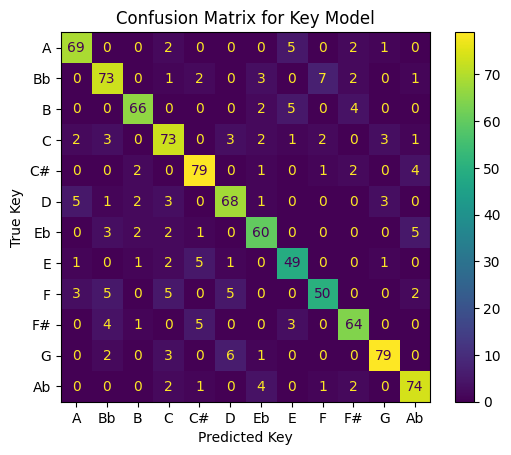

In [ ]:
#@title Training the Model with Linear Regression Classifiers (Key)
r = random.randint(1,16777216)
print(r)
X_train_data_key, X_test_data_key, y_train_data_key, y_test_data_key = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

key_model = sk.linear_model.LogisticRegression(penalty='l2',
                                           dual=False,
                                           tol=0.0001,
                                           C=1,
                                           fit_intercept=True,
                                           intercept_scaling=1,
                                           class_weight=None,
                                           random_state=None,
                                           solver='lbfgs',
                                           max_iter=100,
                                           verbose=1,
                                           warm_start=True,
                                           n_jobs=None,
                                           l1_ratio=None
                                           )
key_model.fit(X_train_data_key, y_train_data_key)
predictions = key_model.predict(X_test_data_key)
# sk.metrics.confusion_matrix(y_test_data_key, predictions)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(key_model, X_test_data_key, y_test_data_key, labels=labels)
ds.ax_.set_title("Confusion Matrix for Key Model")
ds.ax_.set_xlabel("Predicted Key")
ds.ax_.set_ylabel("True Key")
print(sk.metrics.accuracy_score(y_test_data_key, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_key, predictions))

4737492
0.8471933471933472
0.8464399473023589


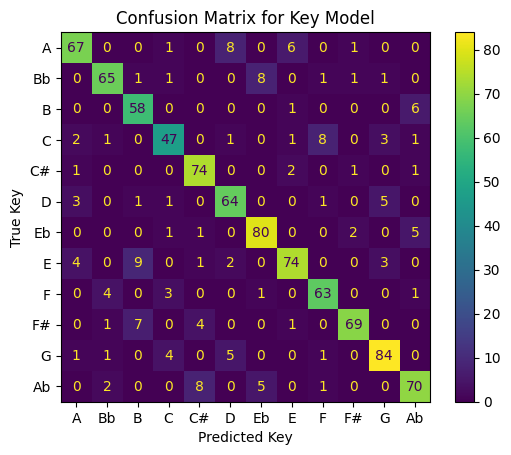

In [ ]:
#@title Training the Model with Bernoulli Naive Bayes Classifiers (Key)
r = random.randint(1,16777216)
print(r)
X_train_data_key, X_test_data_key, y_train_data_key, y_test_data_key = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)
key_model = sk.naive_bayes.BernoulliNB(binarize=8.333)
key_model.fit(X_train_data_key, y_train_data_key)
predictions = key_model.predict(X_test_data_key)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(key_model, X_test_data_key, y_test_data_key, labels=labels)
ds.ax_.set_title("Confusion Matrix for Key Model")
ds.ax_.set_xlabel("Predicted Key")
ds.ax_.set_ylabel("True Key")
print(sk.metrics.accuracy_score(y_test_data_key, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_key, predictions))

3894453
0.867983367983368
0.8699981562504201


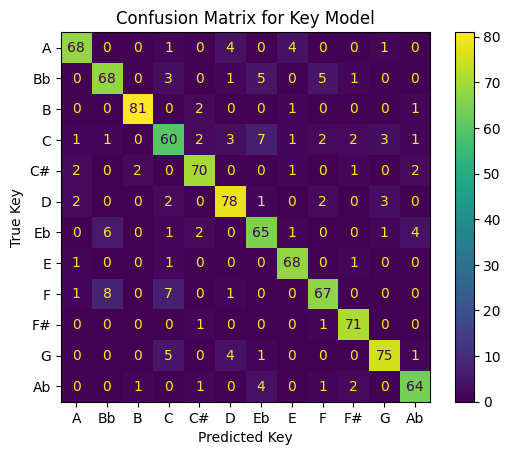

In [ ]:
#@title Training the Model with Decision Tree Classifiers (Key)
r = random.randint(1,16777216)
print(r)
X_train_data_key, X_test_data_key, y_train_data_key, y_test_data_key = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

key_model = sk.tree.DecisionTreeClassifier()
key_model.fit(X_train_data_key, y_train_data_key)
predictions = key_model.predict(X_test_data_key)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(key_model, X_test_data_key, y_test_data_key, labels=labels)
ds.ax_.set_title("Confusion Matrix for Key Model")
ds.ax_.set_xlabel("Predicted Key")
ds.ax_.set_ylabel("True Key")
print(sk.metrics.accuracy_score(y_test_data_key, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_key, predictions))

14413954
0.7869022869022869
0.7888583572206559


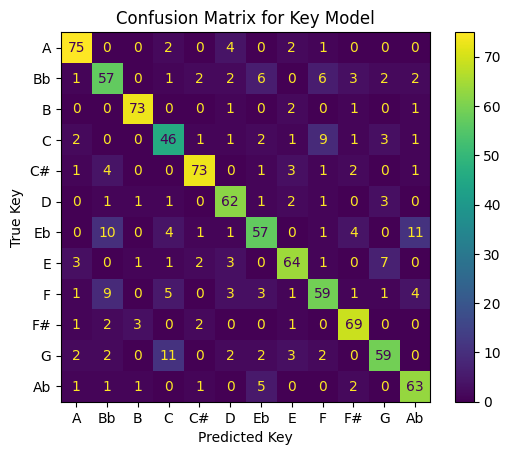

In [ ]:
#@title Training the Model with Extra Trees Classifiers (Key)
r = random.randint(1,16777216)
print(r)
X_train_data_key, X_test_data_key, y_train_data_key, y_test_data_key = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

key_model = sk.tree.ExtraTreeClassifier()
key_model.fit(X_train_data_key, y_train_data_key)
predictions = key_model.predict(X_test_data_key)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(key_model, X_test_data_key, y_test_data_key, labels=labels)
ds.ax_.set_title("Confusion Matrix for Key Model")
ds.ax_.set_xlabel("Predicted Key")
ds.ax_.set_ylabel("True Key")
print(sk.metrics.accuracy_score(y_test_data_key, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_key, predictions))

8591542
0.8128898128898129
0.8103754821041059


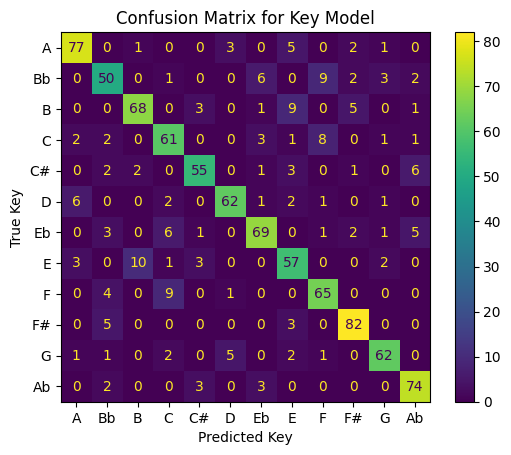

In [ ]:
#@title Training the Model with Gaussian Naive Bayes Classifiers (Key)
r = random.randint(1,16777216)
print(r)
X_train_data_key, X_test_data_key, y_train_data_key, y_test_data_key = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

key_model = sk.naive_bayes.GaussianNB()
key_model.fit(X_train_data_key, y_train_data_key)
predictions = key_model.predict(X_test_data_key)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(key_model, X_test_data_key, y_test_data_key, labels=labels)
ds.ax_.set_title("Confusion Matrix for Key Model")
ds.ax_.set_xlabel("Predicted Key")
ds.ax_.set_ylabel("True Key")
print(sk.metrics.accuracy_score(y_test_data_key, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_key, predictions))

1754631
0.9272349272349273
0.9285372182708084


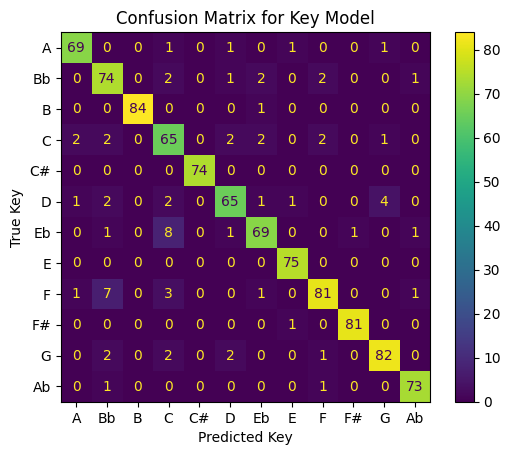

In [ ]:
#@title Training the Model with KNN Classifiers (Key)
r = random.randint(1,16777216)
print(r)
X_train_data_key, X_test_data_key, y_train_data_key, y_test_data_key = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

key_model = sk.neighbors.KNeighborsClassifier()
key_model.fit(X_train_data_key, y_train_data_key)
predictions = key_model.predict(X_test_data_key)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(key_model, X_test_data_key, y_test_data_key, labels=labels)
ds.ax_.set_title("Confusion Matrix for Key Model")
ds.ax_.set_xlabel("Predicted Key")
ds.ax_.set_ylabel("True Key")
print(sk.metrics.accuracy_score(y_test_data_key, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_key, predictions))

777422
0.8336798336798337
0.8321311741571583


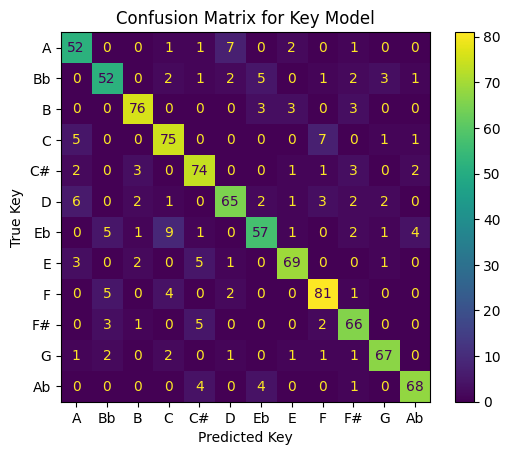

In [ ]:
#@title Training the Model with Linear Discriminant Analysis Classifiers (Key)
r = random.randint(1,16777216)
print(r)
X_train_data_key, X_test_data_key, y_train_data_key, y_test_data_key = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

key_model = sk.discriminant_analysis.LinearDiscriminantAnalysis()
key_model.fit(X_train_data_key, y_train_data_key)
predictions = key_model.predict(X_test_data_key)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(key_model, X_test_data_key, y_test_data_key, labels=labels)
ds.ax_.set_title("Confusion Matrix for Key Model")
ds.ax_.set_xlabel("Predicted Key")
ds.ax_.set_ylabel("True Key")
print(sk.metrics.accuracy_score(y_test_data_key, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_key, predictions))

7436656
0.8440748440748441
0.8450403108038115


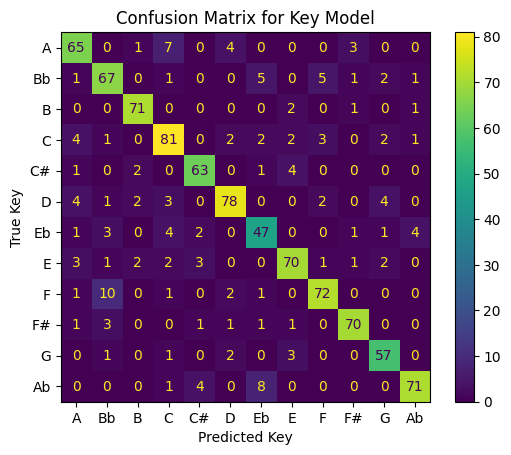

In [ ]:
#@title Training the Model with Linear SVCs (Key)
r = random.randint(1,16777216)
print(r)
X_train_data_key, X_test_data_key, y_train_data_key, y_test_data_key = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

key_model = sk.svm.LinearSVC()
key_model.fit(X_train_data_key, y_train_data_key)
predictions = key_model.predict(X_test_data_key)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(key_model, X_test_data_key, y_test_data_key, labels=labels)
ds.ax_.set_title("Confusion Matrix for Key Model")
ds.ax_.set_xlabel("Predicted Key")
ds.ax_.set_ylabel("True Key")
print(sk.metrics.accuracy_score(y_test_data_key, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_key, predictions))

11442299
0.8669438669438669
0.8665770666028664


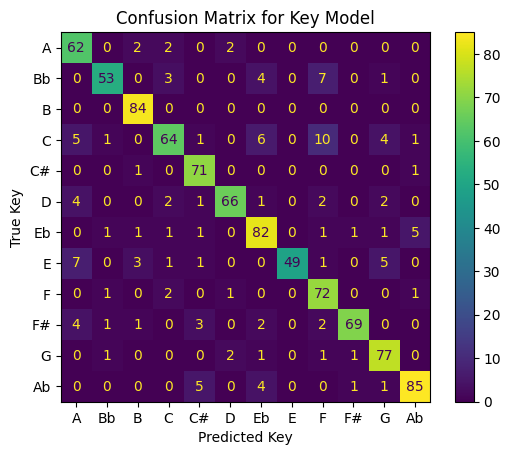

In [ ]:
#@title Training the Model with MLP (Key)
r = random.randint(1,16777216)
print(r)
X_train_data_key, X_test_data_key, y_train_data_key, y_test_data_key = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

key_model = sk.neural_network.MLPClassifier()
key_model.fit(X_train_data_key, y_train_data_key)
predictions = key_model.predict(X_test_data_key)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(key_model, X_test_data_key, y_test_data_key, labels=labels)
ds.ax_.set_title("Confusion Matrix for Key Model")
ds.ax_.set_xlabel("Predicted Key")
ds.ax_.set_ylabel("True Key")
print(sk.metrics.accuracy_score(y_test_data_key, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_key, predictions))

8982237
0.5987525987525988
0.5993030788771464


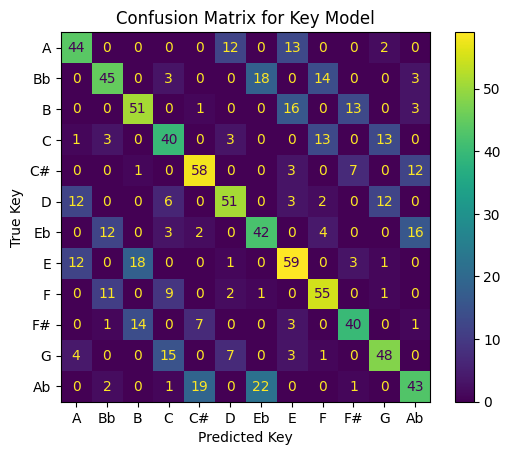

In [ ]:
#@title Training the Model with Nearest Centroid Classifiers (Key)
r = random.randint(1,16777216)
print(r)
X_train_data_key, X_test_data_key, y_train_data_key, y_test_data_key = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

key_model = sk.neighbors.NearestCentroid()
key_model.fit(X_train_data_key, y_train_data_key)
predictions = key_model.predict(X_test_data_key)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(key_model, X_test_data_key, y_test_data_key, labels=labels)
ds.ax_.set_title("Confusion Matrix for Key Model")
ds.ax_.set_xlabel("Predicted Key")
ds.ax_.set_ylabel("True Key")
print(sk.metrics.accuracy_score(y_test_data_key, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_key, predictions))

9424151
0.8617463617463618
0.8595253222645854


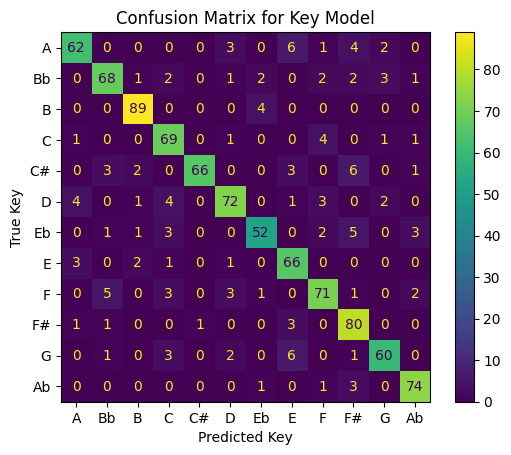

In [ ]:
#@title Training the Model with Quadratic Discriminant Analysis Classifiers (Key)
r = random.randint(1,16777216)
print(r)
X_train_data_key, X_test_data_key, y_train_data_key, y_test_data_key = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

key_model = sk.discriminant_analysis.QuadraticDiscriminantAnalysis(reg_param=0.99)
key_model.fit(X_train_data_key, y_train_data_key)
predictions = key_model.predict(X_test_data_key)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(key_model, X_test_data_key, y_test_data_key, labels=labels)
ds.ax_.set_title("Confusion Matrix for Key Model")
ds.ax_.set_xlabel("Predicted Key")
ds.ax_.set_ylabel("True Key")
print(sk.metrics.accuracy_score(y_test_data_key, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_key, predictions))

10696742


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:864: UserWarning: Outlier label most-frequent is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:864: UserWarning: Outlier label most-frequent is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(


0.9251559251559252
0.9231467917812557


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


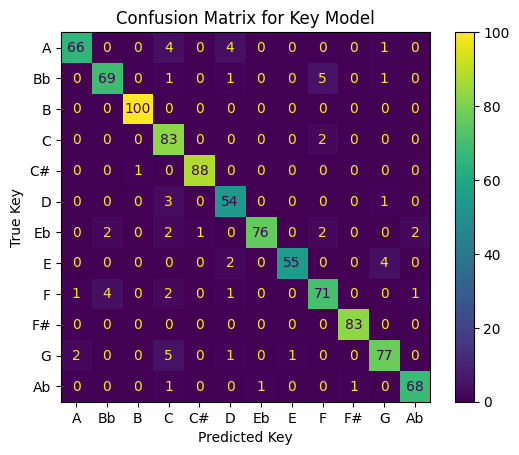

In [ ]:
#@title Training the Model with Radius Neighbors Classifiers (Key)
r = random.randint(1,16777216)
print(r)
X_train_data_key, X_test_data_key, y_train_data_key, y_test_data_key = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

key_model = sk.neighbors.RadiusNeighborsClassifier(radius=75, outlier_label='most-frequent')
key_model.fit(X_train_data_key, y_train_data_key)
predictions = key_model.predict(X_test_data_key)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(key_model, X_test_data_key, y_test_data_key, labels=labels)
ds.ax_.set_title("Confusion Matrix for Key Model")
ds.ax_.set_xlabel("Predicted Key")
ds.ax_.set_ylabel("True Key")
print(sk.metrics.accuracy_score(y_test_data_key, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_key, predictions))

5146750
0.9449064449064449
0.944922724440656


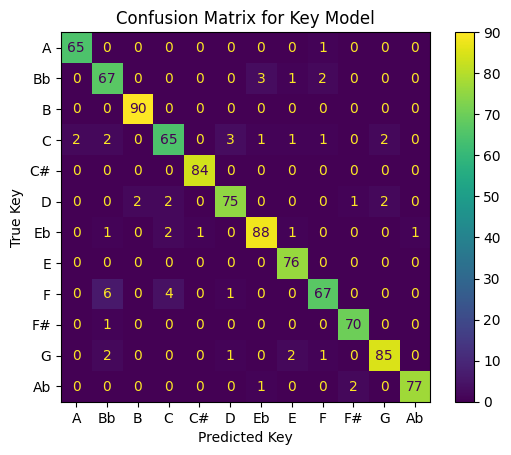

In [ ]:
#@title Training the Model with Random Forest Classifiers (Key)
r = random.randint(1,16777216)
print(r)
X_train_data_key, X_test_data_key, y_train_data_key, y_test_data_key = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

key_model = sk.ensemble.RandomForestClassifier()
key_model.fit(X_train_data_key, y_train_data_key)
predictions = key_model.predict(X_test_data_key)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(key_model, X_test_data_key, y_test_data_key, labels=labels)
ds.ax_.set_title("Confusion Matrix for Key Model")
ds.ax_.set_xlabel("Predicted Key")
ds.ax_.set_ylabel("True Key")
print(sk.metrics.accuracy_score(y_test_data_key, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_key, predictions))

2747620
0.7349272349272349
0.7353552723268405


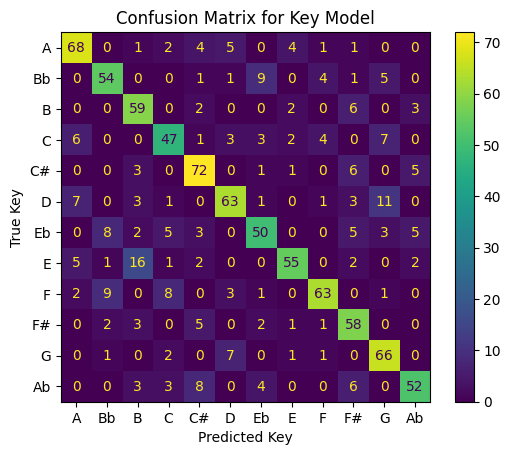

In [ ]:
#@title Training the Model with Ridge Classifiers (Key)
r = random.randint(1,16777216)
print(r)
X_train_data_key, X_test_data_key, y_train_data_key, y_test_data_key = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

key_model = sk.linear_model.RidgeClassifier()
key_model.fit(X_train_data_key, y_train_data_key)
predictions = key_model.predict(X_test_data_key)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(key_model, X_test_data_key, y_test_data_key, labels=labels)
ds.ax_.set_title("Confusion Matrix for Key Model")
ds.ax_.set_xlabel("Predicted Key")
ds.ax_.set_ylabel("True Key")
print(sk.metrics.accuracy_score(y_test_data_key, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_key, predictions))

6411774
0.9012474012474012
0.9041704104482832


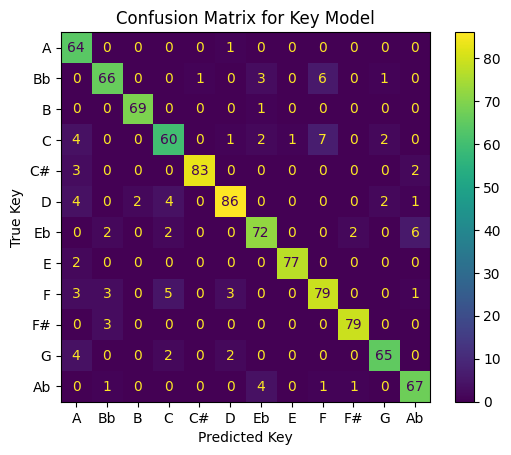

In [ ]:
#@title Training the Model with Nu-SVCs (Key)
r = random.randint(1,16777216)
print(r)
X_train_data_key, X_test_data_key, y_train_data_key, y_test_data_key = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)
key_model = sk.svm.NuSVC(nu=0.06)
key_model.fit(X_train_data_key, y_train_data_key)
predictions = key_model.predict(X_test_data_key)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(key_model, X_test_data_key, y_test_data_key, labels=labels)
ds.ax_.set_title("Confusion Matrix for Key Model")
ds.ax_.set_xlabel("Predicted Key")
ds.ax_.set_ylabel("True Key")
print(sk.metrics.accuracy_score(y_test_data_key, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_key, predictions))

6171214
0.9251559251559252
0.9240356385974007


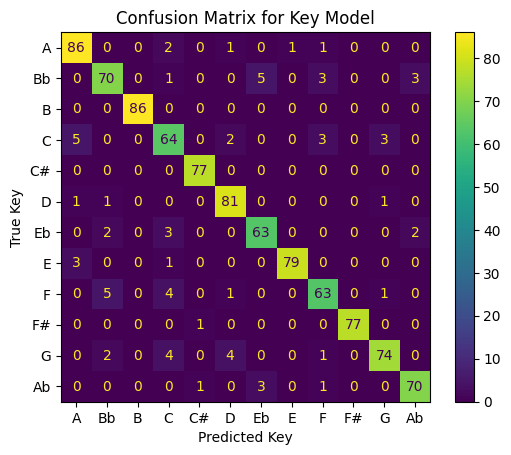

In [ ]:
#@title Training the Model with SVCs (Key)
r = random.randint(1,16777216)
print(r)
X_train_data_key, X_test_data_key, y_train_data_key, y_test_data_key = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)
key_model = sk.svm.SVC(C=1000)
key_model.fit(X_train_data_key, y_train_data_key)
predictions = key_model.predict(X_test_data_key)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(key_model, X_test_data_key, y_test_data_key, labels=labels)
ds.ax_.set_title("Confusion Matrix for Key Model")
ds.ax_.set_xlabel("Predicted Key")
ds.ax_.set_ylabel("True Key")
print(sk.metrics.accuracy_score(y_test_data_key, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_key, predictions))

16280096
0.9303534303534303
0.9318746313680744


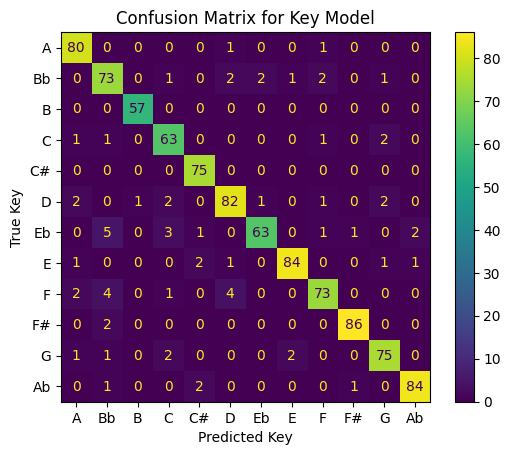

In [ ]:
#@title Training the Model with GBCs (Key)
r = random.randint(1,16777216)
print(r)
X_train_data_key, X_test_data_key, y_train_data_key, y_test_data_key = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)
key_model = sk.ensemble.GradientBoostingClassifier()
key_model.fit(X_train_data_key, y_train_data_key)
predictions = key_model.predict(X_test_data_key)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(key_model, X_test_data_key, y_test_data_key, labels=labels)
ds.ax_.set_title("Confusion Matrix for Key Model")
ds.ax_.set_xlabel("Predicted Key")
ds.ax_.set_ylabel("True Key")
print(sk.metrics.accuracy_score(y_test_data_key, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_key, predictions))

11579246
0.8222453222453222
0.8230157628842777


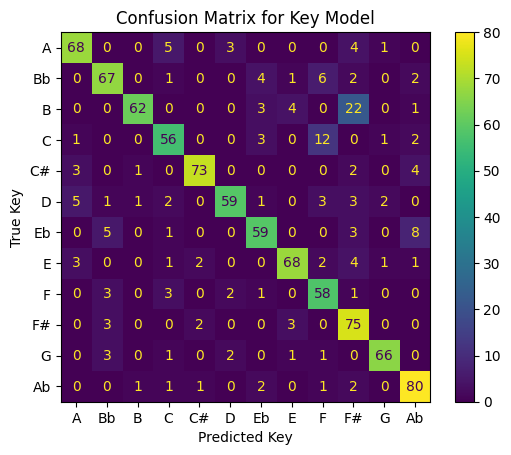

In [ ]:
#@title Training the Model with SGD Classifiers (Key)
r = random.randint(1,16777216)
print(r)
X_train_data_key, X_test_data_key, y_train_data_key, y_test_data_key = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)
key_model = sk.linear_model.SGDClassifier(alpha=7)
key_model.fit(X_train_data_key, y_train_data_key)
predictions = key_model.predict(X_test_data_key)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(key_model, X_test_data_key, y_test_data_key, labels=labels)
ds.ax_.set_title("Confusion Matrix for Key Model")
ds.ax_.set_xlabel("Predicted Key")
ds.ax_.set_ylabel("True Key")
print(sk.metrics.accuracy_score(y_test_data_key, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_key, predictions))

8013491
0.6694386694386695
0.6747585762367251


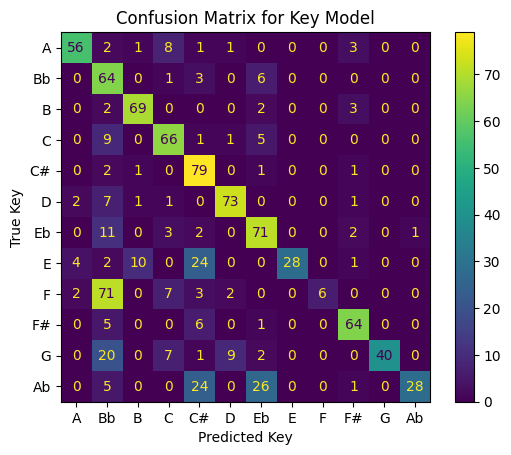

In [ ]:
#@title Training the Model with Passive Aggresive Classifiers (Key)
r = random.randint(1,16777216)
print(r)
X_train_data_key, X_test_data_key, y_train_data_key, y_test_data_key = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)
key_model = sk.linear_model.PassiveAggressiveClassifier(max_iter=10000)
key_model.fit(X_train_data_key, y_train_data_key)
predictions = key_model.predict(X_test_data_key)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(key_model, X_test_data_key, y_test_data_key, labels=labels)
ds.ax_.set_title("Confusion Matrix for Key Model")
ds.ax_.set_xlabel("Predicted Key")
ds.ax_.set_ylabel("True Key")
print(sk.metrics.accuracy_score(y_test_data_key, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_key, predictions))

major 2425
major 2426
major 2427
major 2428
major 2429
major 2430
major 2431
major 2432
major 2433
major 2434
major 2435
major 2436
major 2437
major 2438
major 2439
major 2440
major 2441
major 2442
major 2443
major 2444
major 2445
major 2446
major 2447
major 2448
major 2449
major 2450
major 2451
major 2452
major 2453
major 2454
major 2455
major 2456
major 2457
major 2458
major 2459
major 2460
major 2461
major 2462
major 2463
major 2464
major 2465
major 2466
major 2467
major 2468
major 2469
major 2470
major 2471
major 2472
major 2473
major 2474
major 2475
major 2476
major 2477
major 2478
major 2479
major 2480
major 2481
major 2482
major 2483
major 2484
major 2485
major 2486
major 2487
major 2488
major 2489
major 2490
major 2491
major 2492
major 2493
major 2494
major 2495
major 2496
major 2497
major 2498
major 2499
major 2500
minor 1431
minor 1432
minor 1433
minor 1434
minor 1435
minor 1436
minor 1437
minor 1438
minor 1439
minor 1440
minor 1441
minor 1442
minor 1443
minor 1444
minor 1445

<Axes: xlabel='mode'>

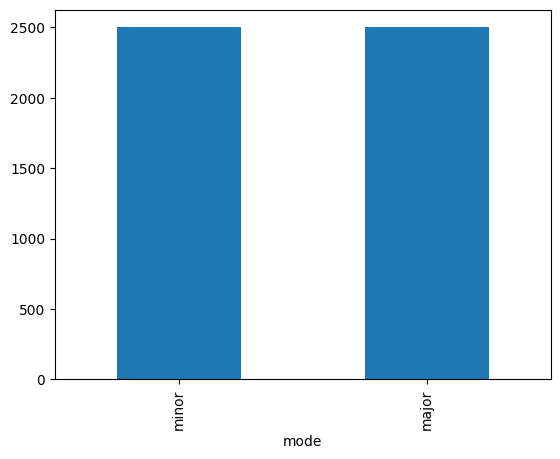

In [3]:
#@title Data Augmentation (Mode)
i=0
piece_data_addition=[]
shuffled_data = piece_data.sample(frac=1)
for amt in piece_data["mode"].value_counts():
  current_mode = piece_data["mode"].value_counts().index[i]
  current_amt = amt
  while current_amt <= 2500:
    for j in range(0,len(shuffled_data)):
      current_row = shuffled_data.iloc[j]
      if current_row["mode"] == current_mode:
        print(current_mode, current_amt)
        new_row = current_row.copy()

        keys = list(new_row.keys())
        for k in range(0,len(new_row)):
          if keys[k] != "name" and keys[k] != "path" and keys[k] != "key" and keys[k] != "mode" and keys[k] != "style":
              new_row[keys[k]] += np.random.normal(0, (0.1*new_row[keys[k]]))
        new_row["name"]=new_row["name"] + " (Augmented)"
        new_row["path"]="N/A (This piece of data was augmented)"
        piece_data_addition.append(new_row)
        current_amt+=1
      if current_amt > 2500:
        break

  i+=1
piece_data_addition = pd.DataFrame(piece_data_addition)
piece_data["mode"].value_counts().plot(kind = 'bar')
piece_data_mode = pd.concat([piece_data, piece_data_addition], ignore_index=True)
piece_data_mode["mode"].value_counts().plot(kind = 'bar')
# piece_data.describe()
# style_data = pd.Series(piece_data["style"]).value_counts()
# piece_data.key.value_counts().plot(kind = 'bar')
# print(piece_data.key.value_counts().index)

In [4]:
#@title Preparing Data for Mode Identification
# x_key = piece_data_mode.drop(['key', 'style', 'mode', 'name', 'path', 'binaryrhythmrate','tripletenterrate','tripletexitrate','quintupletenterrate','quintupletexitrate'], axis = 1)
# predictions = key_model.predict(x_key)
# print(predictions)
keys = piece_data_mode["key"]
X=[]
keys_in_order=["A", "Bb", "B", "C", "C#", "D", "Eb", "E", "F", "F#", "G", "Ab"]
# print(len(predictions),len(piece_data_mode["numA"]))
for i in range(0, len(keys)):
  print(i)
  entry=[]
  for k in range(0,len(keys_in_order)):
    if keys_in_order[k] == keys[i]:
      key=k
      break
  for j in range(0,12):
    entry.append(piece_data_mode["num" + keys_in_order[(key+j)%12]][i])
  for j in range(0,12):
    entry.append(piece_data_mode["num" + keys_in_order[(key+j)%12]+"w"][i])
  for j in range(0,12):
    entry.append(piece_data_mode["num" + keys_in_order[(key+j)%12]+"25"][i])
  for j in range(0,12):
    entry.append(piece_data_mode["num" + keys_in_order[(key+j)%12]+"w25"][i])
  for j in range(0,12):
    entry.append(piece_data_mode["num" + keys_in_order[(key+j)%12]+"10"][i])
  for j in range(0,12):
    entry.append(piece_data_mode["num" + keys_in_order[(key+j)%12]+"w10"][i])
  for j in range(0,12):
    entry.append(piece_data_mode["scale" + keys_in_order[(key+j)%12]][i])
  for j in range(0,12):
    entry.append(piece_data_mode["scale" + keys_in_order[(key+j)%12]+"w"][i])
  for j in range(0,12):
    entry.append(piece_data_mode["scale" + keys_in_order[(key+j)%12]+"25"][i])
  for j in range(0,12):
    entry.append(piece_data_mode["scale" + keys_in_order[(key+j)%12]+"w25"][i])
  for j in range(0,12):
    entry.append(piece_data_mode["scale" + keys_in_order[(key+j)%12]+"10"][i])
  for j in range(0,12):
    entry.append(piece_data_mode["scale" + keys_in_order[(key+j)%12]+"w10"][i])
  X.append(entry)
# print(x)
X = pd.DataFrame(X, columns=[
    "numi",
    "num#i",
    "numii",
    "numbiii",
    "numiii",
    "numiv",
    "num#iv",
    "numv",
    "numbvi",
    "numvi",
    "numbvii",
    "numvii",
    "numiw",
    "num#iw",
    "numiiw",
    "numbiiiw",
    "numiiiw",
    "numivw",
    "num#ivw",
    "numvw",
    "numbviw",
    "numviw",
    "numbviiw",
    "numviiw",
    "numi25",
    "num#i25",
    "numii25",
    "numbiii25",
    "numiii25",
    "numiv25",
    "num#iv25",
    "numv25",
    "numbvi25",
    "numvi25",
    "numbvii25",
    "numvii25",
    "numiw25",
    "num#iw25",
    "numiiw25",
    "numbiiiw25",
    "numiiiw25",
    "numivw25",
    "num#ivw25",
    "numvw25",
    "numbviw25",
    "numviw25",
    "numbviiw25",
    "numviiw25",
    "numi10",
    "num#i10",
    "numii10",
    "numbiii10",
    "numiii10",
    "numiv10",
    "num#iv10",
    "numv10",
    "numbvi10",
    "numvi10",
    "numbvii10",
    "numvii10",
    "numiw10",
    "num#iw10",
    "numiiw10",
    "numbiiiw10",
    "numiiiw10",
    "numivw10",
    "num#ivw10",
    "numvw10",
    "numbviw10",
    "numviw10",
    "numbviiw10",
    "numviiw10",
    "scalei",
    "scale#i",
    "scaleii",
    "scalebiii",
    "scaleiii",
    "scaleiv",
    "scale#iv",
    "scalev",
    "scalebvi",
    "scalevi",
    "scalebvii",
    "scalevii",
    "scaleiw",
    "scale#iw",
    "scaleiiw",
    "scalebiiiw",
    "scaleiiiw",
    "scaleivw",
    "scale#ivw",
    "scalevw",
    "scalebviw",
    "scaleviw",
    "scalebviiw",
    "scaleviiw",
    "scalei25",
    "scale#i25",
    "scaleii25",
    "scalebiii25",
    "scaleiii25",
    "scaleiv25",
    "scale#iv25",
    "scalev25",
    "scalebvi25",
    "scalevi25",
    "scalebvii25",
    "scalevii25",
    "scaleiw25",
    "scale#iw25",
    "scaleiiw25",
    "scalebiiiw25",
    "scaleiiiw25",
    "scaleivw25",
    "scale#ivw25",
    "scalevw25",
    "scalebviw25",
    "scaleviw25",
    "scalebviiw25",
    "scaleviiw25",
    "scalei10",
    "scale#i10",
    "scaleii10",
    "scalebiii10",
    "scaleiii10",
    "scaleiv10",
    "scale#iv10",
    "scalev10",
    "scalebvi10",
    "scalevi10",
    "scalebvii10",
    "scalevii10",
    "scaleiw10",
    "scale#iw10",
    "scaleiiw10",
    "scalebiiiw10",
    "scaleiiiw10",
    "scaleivw10",
    "scale#ivw10",
    "scalevw10",
    "scalebviw10",
    "scaleviw10",
    "scalebviiw10",
    "scaleviiw10",
])
y = piece_data_mode["mode"]
print("Shape:", X.shape)
print("Shape:", y.shape)
X.describe()
y.value_counts()

Streaming output truncated to the last 5000 lines.
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266

,count
mode,
minor,2501
major,2501


14155780


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9720558882235529
0.9720398406374502


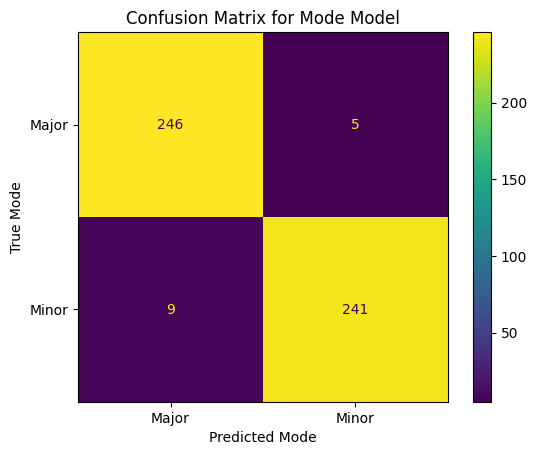

In [5]:
#@title Training the Model with Linear Regression Classifiers (Mode)
r = random.randint(1,16777216)
print(r)
X_train_data_mode, X_test_data_mode, y_train_data_mode, y_test_data_mode = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

mode_model = sk.linear_model.LogisticRegression(penalty='l2',
                                           dual=False,
                                           tol=0.0001,
                                           C=1,
                                           fit_intercept=True,
                                           intercept_scaling=1,
                                           class_weight=None,
                                           random_state=None,
                                           solver='lbfgs',
                                           max_iter=100,
                                           verbose=1,
                                           warm_start=True,
                                           n_jobs=None,
                                           l1_ratio=None
                                           )
mode_model.fit(X_train_data_mode, y_train_data_mode)
predictions = mode_model.predict(X_test_data_mode)
# sk.metrics.confusion_matrix(y_test_data_mode, predictions)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(mode_model, X_test_data_mode, y_test_data_mode)
ds.ax_.set_title("Confusion Matrix for Mode Model")
ds.ax_.set_xlabel("Predicted Mode")
ds.ax_.set_ylabel("True Mode")
ds.ax_.xaxis.set_ticklabels(['Major', 'Minor']);
ds.ax_.yaxis.set_ticklabels(['Major', 'Minor']);
print(sk.metrics.accuracy_score(y_test_data_mode, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_mode, predictions))

15947954
0.9181636726546906
0.9180770701855039


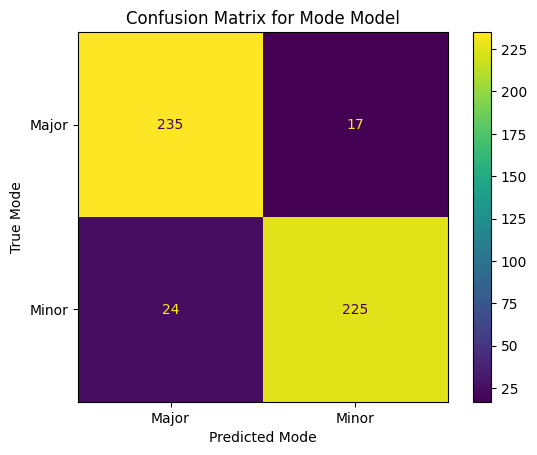

In [6]:
#@title Training the Model with Bernoulli Naive Bayes Classifiers (Mode)
r = random.randint(1,16777216)
print(r)
X_train_data_mode, X_test_data_mode, y_train_data_mode, y_test_data_mode = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

mode_model = sk.naive_bayes.BernoulliNB(binarize=50)
mode_model.fit(X_train_data_mode, y_train_data_mode)
predictions = mode_model.predict(X_test_data_mode)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(mode_model, X_test_data_mode, y_test_data_mode)
ds.ax_.set_title("Confusion Matrix for Mode Model")
ds.ax_.set_xlabel("Predicted Mode")
ds.ax_.set_ylabel("True Mode")
ds.ax_.xaxis.set_ticklabels(['Major', 'Minor']);
ds.ax_.yaxis.set_ticklabels(['Major', 'Minor']);
print(sk.metrics.accuracy_score(y_test_data_mode, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_mode, predictions))

9596320
0.9421157684630739
0.9425630386211299


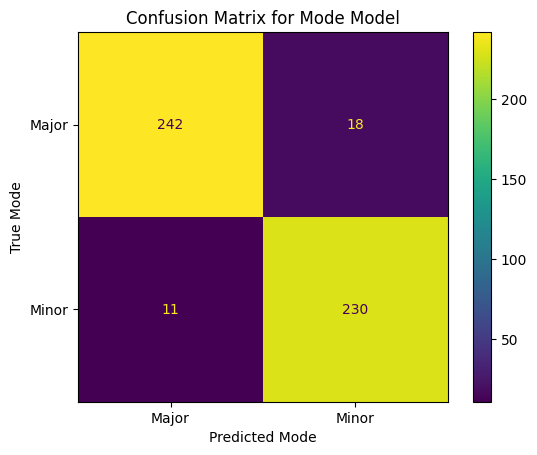

In [7]:
#@title Training the Model with Decision Tree Classifiers (Mode)
r = random.randint(1,16777216)
print(r)
X_train_data_mode, X_test_data_mode, y_train_data_mode, y_test_data_mode = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

mode_model = sk.tree.DecisionTreeClassifier()
mode_model.fit(X_train_data_mode, y_train_data_mode)
predictions = mode_model.predict(X_test_data_mode)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(mode_model, X_test_data_mode, y_test_data_mode)
ds.ax_.set_title("Confusion Matrix for Mode Model")
ds.ax_.set_xlabel("Predicted Mode")
ds.ax_.set_ylabel("True Mode")
ds.ax_.xaxis.set_ticklabels(['Major', 'Minor']);
ds.ax_.yaxis.set_ticklabels(['Major', 'Minor']);
print(sk.metrics.accuracy_score(y_test_data_mode, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_mode, predictions))

10408017
0.9041916167664671
0.9040234100912165


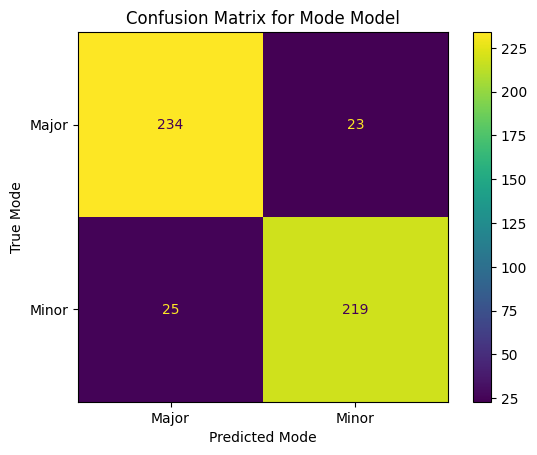

In [8]:
#@title Training the Model with Extra Trees Classifiers (Mode)
r = random.randint(1,16777216)
print(r)
X_train_data_mode, X_test_data_mode, y_train_data_mode, y_test_data_mode = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

mode_model = sk.tree.ExtraTreeClassifier()
mode_model.fit(X_train_data_mode, y_train_data_mode)
predictions = mode_model.predict(X_test_data_mode)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(mode_model, X_test_data_mode, y_test_data_mode)
ds.ax_.set_title("Confusion Matrix for Mode Model")
ds.ax_.set_xlabel("Predicted Mode")
ds.ax_.set_ylabel("True Mode")
ds.ax_.xaxis.set_ticklabels(['Major', 'Minor']);
ds.ax_.yaxis.set_ticklabels(['Major', 'Minor']);
print(sk.metrics.accuracy_score(y_test_data_mode, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_mode, predictions))

11051077
0.9201596806387226
0.9205967045272756


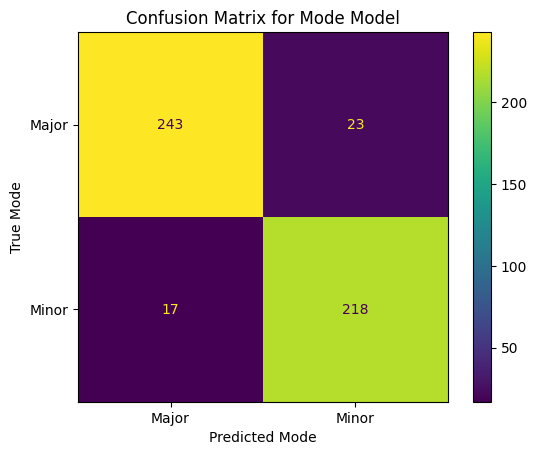

In [9]:
#@title Training the Model with Gaussian Naive Bayes Classifiers (Mode)
r = random.randint(1,16777216)
print(r)
X_train_data_mode, X_test_data_mode, y_train_data_mode, y_test_data_mode = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

mode_model = sk.naive_bayes.GaussianNB()
mode_model.fit(X_train_data_mode, y_train_data_mode)
predictions = mode_model.predict(X_test_data_mode)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(mode_model, X_test_data_mode, y_test_data_mode)
ds.ax_.set_title("Confusion Matrix for Mode Model")
ds.ax_.set_xlabel("Predicted Mode")
ds.ax_.set_ylabel("True Mode")
ds.ax_.xaxis.set_ticklabels(['Major', 'Minor']);
ds.ax_.yaxis.set_ticklabels(['Major', 'Minor']);
print(sk.metrics.accuracy_score(y_test_data_mode, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_mode, predictions))

5628895
0.9520958083832335
0.9526854627798687


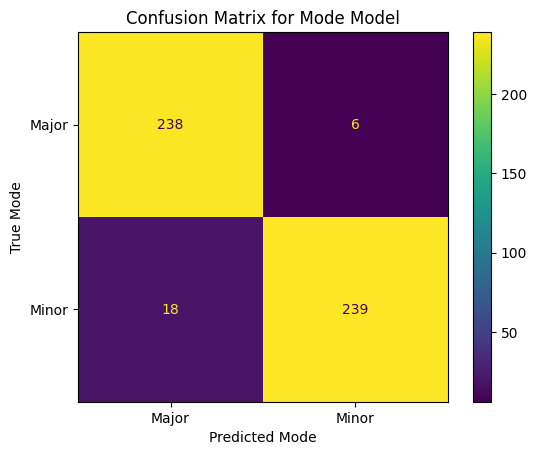

In [10]:
#@title Training the Model with KNN Classifiers (Mode)
r = random.randint(1,16777216)
print(r)
X_train_data_mode, X_test_data_mode, y_train_data_mode, y_test_data_mode = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

mode_model = sk.neighbors.KNeighborsClassifier()
mode_model.fit(X_train_data_mode, y_train_data_mode)
predictions = mode_model.predict(X_test_data_mode)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(mode_model, X_test_data_mode, y_test_data_mode)
ds.ax_.set_title("Confusion Matrix for Mode Model")
ds.ax_.set_xlabel("Predicted Mode")
ds.ax_.set_ylabel("True Mode")
ds.ax_.xaxis.set_ticklabels(['Major', 'Minor']);
ds.ax_.yaxis.set_ticklabels(['Major', 'Minor']);
print(sk.metrics.accuracy_score(y_test_data_mode, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_mode, predictions))

5400776
0.936127744510978
0.9370176054091982


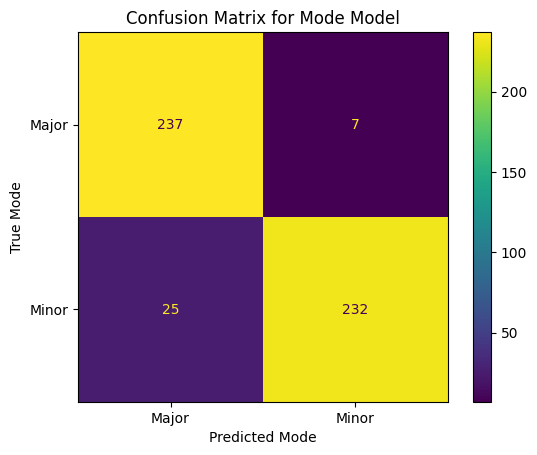

In [11]:
#@title Training the Model with Linear Discriminant Analysis Classifiers (Mode)
r = random.randint(1,16777216)
print(r)
X_train_data_mode, X_test_data_mode, y_train_data_mode, y_test_data_mode = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

mode_model = sk.discriminant_analysis.LinearDiscriminantAnalysis()
mode_model.fit(X_train_data_mode, y_train_data_mode)
predictions = mode_model.predict(X_test_data_mode)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(mode_model, X_test_data_mode, y_test_data_mode)
ds.ax_.set_title("Confusion Matrix for Mode Model")
ds.ax_.set_xlabel("Predicted Mode")
ds.ax_.set_ylabel("True Mode")
ds.ax_.xaxis.set_ticklabels(['Major', 'Minor']);
ds.ax_.yaxis.set_ticklabels(['Major', 'Minor']);
print(sk.metrics.accuracy_score(y_test_data_mode, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_mode, predictions))

12324606
0.9301397205588823
0.9304842024145903


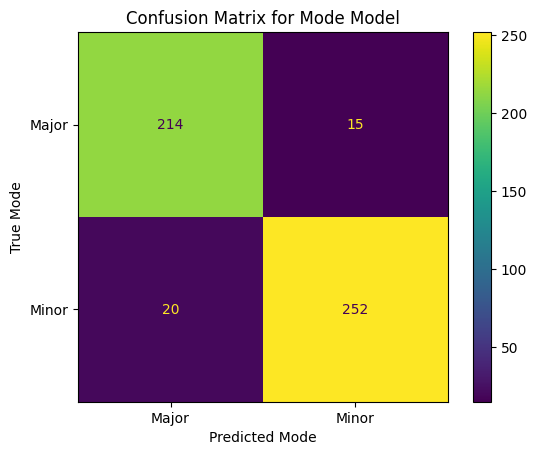

In [12]:
#@title Training the Model with Linear SVCs (Mode)
r = random.randint(1,16777216)
print(r)
X_train_data_mode, X_test_data_mode, y_train_data_mode, y_test_data_mode = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

mode_model = sk.svm.LinearSVC()
mode_model.fit(X_train_data_mode, y_train_data_mode)
predictions = mode_model.predict(X_test_data_mode)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(mode_model, X_test_data_mode, y_test_data_mode)
ds.ax_.set_title("Confusion Matrix for Mode Model")
ds.ax_.set_xlabel("Predicted Mode")
ds.ax_.set_ylabel("True Mode")
ds.ax_.xaxis.set_ticklabels(['Major', 'Minor']);
ds.ax_.yaxis.set_ticklabels(['Major', 'Minor']);
print(sk.metrics.accuracy_score(y_test_data_mode, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_mode, predictions))

8423002
0.936127744510978
0.9346934853628852


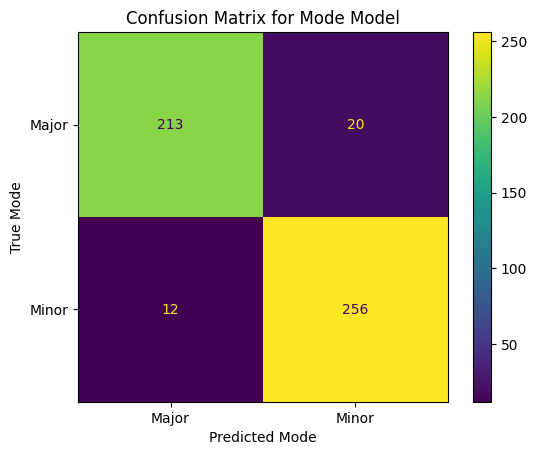

In [13]:
#@title Training the Model with MLP Classifiers (Mode)
r = random.randint(1,16777216)
print(r)
X_train_data_mode, X_test_data_mode, y_train_data_mode, y_test_data_mode = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

mode_model = sk.neural_network.MLPClassifier()
mode_model.fit(X_train_data_mode, y_train_data_mode)
predictions = mode_model.predict(X_test_data_mode)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(mode_model, X_test_data_mode, y_test_data_mode)
ds.ax_.set_title("Confusion Matrix for Mode Model")
ds.ax_.set_xlabel("Predicted Mode")
ds.ax_.set_ylabel("True Mode")
ds.ax_.xaxis.set_ticklabels(['Major', 'Minor']);
ds.ax_.yaxis.set_ticklabels(['Major', 'Minor']);
print(sk.metrics.accuracy_score(y_test_data_mode, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_mode, predictions))

15620704
0.9221556886227545
0.9224225981487393


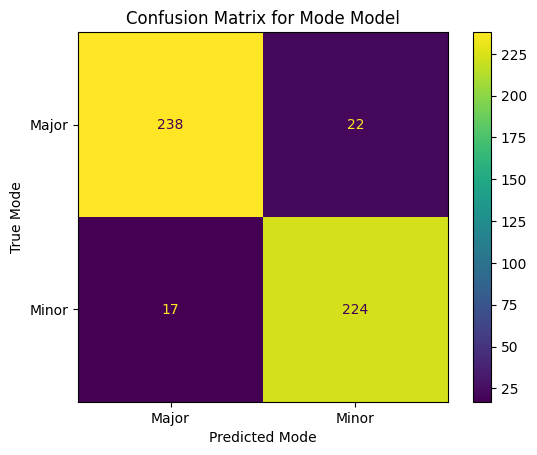

In [14]:
#@title Training the Model with Nearest Centroid Classifiers (Mode)
r = random.randint(1,16777216)
print(r)
X_train_data_mode, X_test_data_mode, y_train_data_mode, y_test_data_mode = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

mode_model = sk.neighbors.NearestCentroid()
mode_model.fit(X_train_data_mode, y_train_data_mode)
predictions = mode_model.predict(X_test_data_mode)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(mode_model, X_test_data_mode, y_test_data_mode)
ds.ax_.set_title("Confusion Matrix for Mode Model")
ds.ax_.set_xlabel("Predicted Mode")
ds.ax_.set_ylabel("True Mode")
ds.ax_.xaxis.set_ticklabels(['Major', 'Minor']);
ds.ax_.yaxis.set_ticklabels(['Major', 'Minor']);
print(sk.metrics.accuracy_score(y_test_data_mode, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_mode, predictions))

6117946
0.9341317365269461
0.9345538049371691


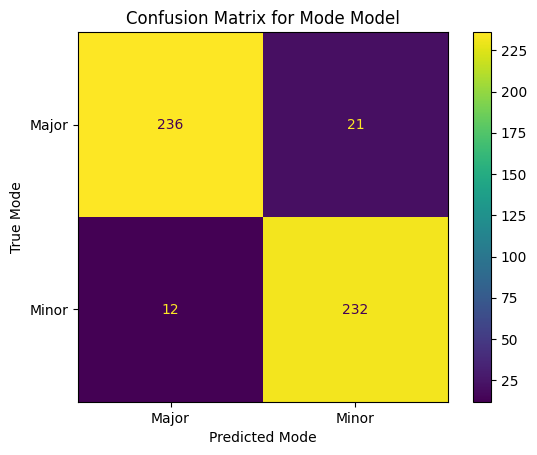

In [15]:
#@title Training the Model with Quadratic Discriminant Analysis Classifiers (Mode)
r = random.randint(1,16777216)
print(r)
X_train_data_mode, X_test_data_mode, y_train_data_mode, y_test_data_mode = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

mode_model = sk.discriminant_analysis.QuadraticDiscriminantAnalysis(reg_param=0.99)
mode_model.fit(X_train_data_mode, y_train_data_mode)
predictions = mode_model.predict(X_test_data_mode)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(mode_model, X_test_data_mode, y_test_data_mode)
ds.ax_.set_title("Confusion Matrix for Mode Model")
ds.ax_.set_xlabel("Predicted Mode")
ds.ax_.set_ylabel("True Mode")
ds.ax_.xaxis.set_ticklabels(['Major', 'Minor']);
ds.ax_.yaxis.set_ticklabels(['Major', 'Minor']);
print(sk.metrics.accuracy_score(y_test_data_mode, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_mode, predictions))

12117237
0.9241516966067864
0.9240253116133763


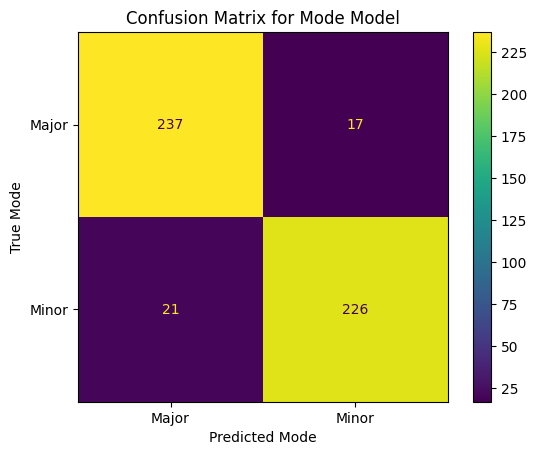

In [16]:
#@title Training the Model with Radius Neighbors Classifiers (Mode)
r = random.randint(1,16777216)
print(r)
X_train_data_mode, X_test_data_mode, y_train_data_mode, y_test_data_mode = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

mode_model = sk.neighbors.RadiusNeighborsClassifier(radius=75, outlier_label='most_frequent')
mode_model.fit(X_train_data_mode, y_train_data_mode)
predictions = mode_model.predict(X_test_data_mode)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(mode_model, X_test_data_mode, y_test_data_mode)
ds.ax_.set_title("Confusion Matrix for Mode Model")
ds.ax_.set_xlabel("Predicted Mode")
ds.ax_.set_ylabel("True Mode")
ds.ax_.xaxis.set_ticklabels(['Major', 'Minor']);
ds.ax_.yaxis.set_ticklabels(['Major', 'Minor']);
print(sk.metrics.accuracy_score(y_test_data_mode, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_mode, predictions))

1425906
0.9800399201596807
0.9800392044367947


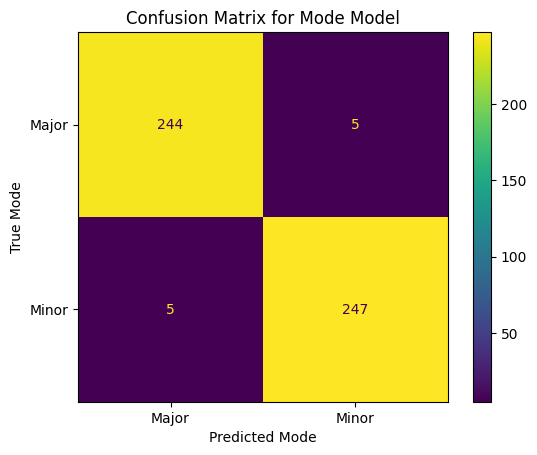

In [17]:
#@title Training the Model with Random Forest Classifiers (Mode)
r = random.randint(1,16777216)
print(r)
X_train_data_mode, X_test_data_mode, y_train_data_mode, y_test_data_mode = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

mode_model = sk.ensemble.RandomForestClassifier()
mode_model.fit(X_train_data_mode, y_train_data_mode)
predictions = mode_model.predict(X_test_data_mode)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(mode_model, X_test_data_mode, y_test_data_mode)
ds.ax_.set_title("Confusion Matrix for Mode Model")
ds.ax_.set_xlabel("Predicted Mode")
ds.ax_.set_ylabel("True Mode")
ds.ax_.xaxis.set_ticklabels(['Major', 'Minor']);
ds.ax_.yaxis.set_ticklabels(['Major', 'Minor']);
print(sk.metrics.accuracy_score(y_test_data_mode, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_mode, predictions))

14072920


ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (2).

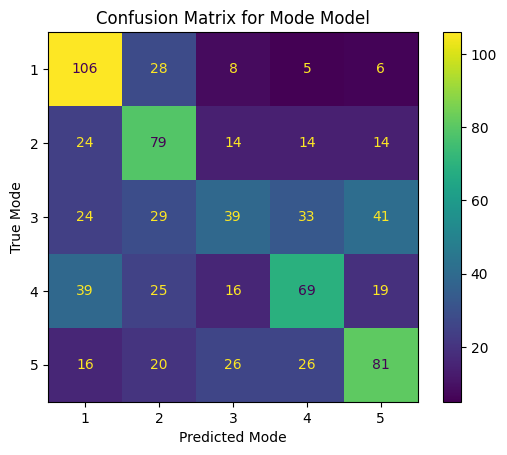

In [46]:
#@title Training the Model with Ridge Classifiers (Mode)
r = random.randint(1,16777216)
print(r)
X_train_data_mode, X_test_data_mode, y_train_data_mode, y_test_data_mode = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

mode_model = sk.linear_model.RidgeClassifier()
mode_model.fit(X_train_data_mode, y_train_data_mode)
predictions = mode_model.predict(X_test_data_mode)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(mode_model, X_test_data_mode, y_test_data_mode)
ds.ax_.set_title("Confusion Matrix for Mode Model")
ds.ax_.set_xlabel("Predicted Mode")
ds.ax_.set_ylabel("True Mode")
ds.ax_.xaxis.set_ticklabels(['Major', 'Minor']);
ds.ax_.yaxis.set_ticklabels(['Major', 'Minor']);
print(sk.metrics.accuracy_score(y_test_data_mode, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_mode, predictions))

9854007
0.9600798403193613
0.9599728954081632


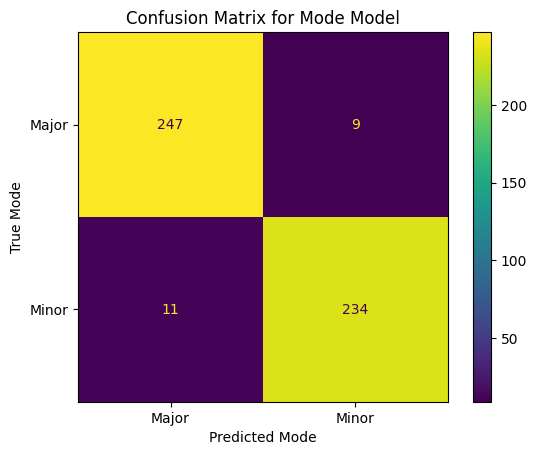

In [19]:
#@title Training the Model with Nu-SVCs (Mode)
r = random.randint(1,16777216)
print(r)
X_train_data_mode, X_test_data_mode, y_train_data_mode, y_test_data_mode = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

mode_model = sk.svm.NuSVC(nu=0.2)
mode_model.fit(X_train_data_mode, y_train_data_mode)
predictions = mode_model.predict(X_test_data_mode)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(mode_model, X_test_data_mode, y_test_data_mode)
ds.ax_.set_title("Confusion Matrix for Mode Model")
ds.ax_.set_xlabel("Predicted Mode")
ds.ax_.set_ylabel("True Mode")
ds.ax_.xaxis.set_ticklabels(['Major', 'Minor']);
ds.ax_.yaxis.set_ticklabels(['Major', 'Minor']);
print(sk.metrics.accuracy_score(y_test_data_mode, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_mode, predictions))

15369718
0.9461077844311377
0.9461809429691734


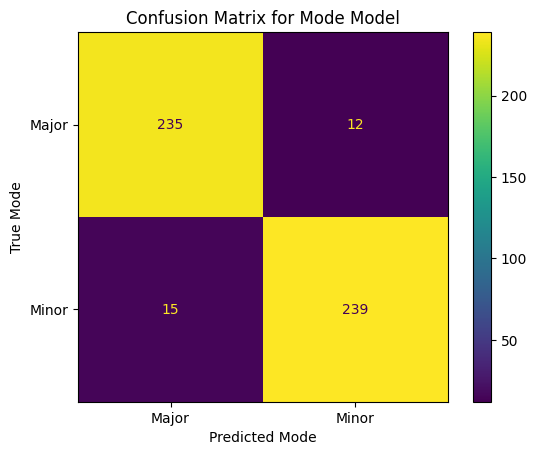

In [20]:
#@title Training the Model with SVCs (Mode)
r = random.randint(1,16777216)
print(r)
X_train_data_mode, X_test_data_mode, y_train_data_mode, y_test_data_mode = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

mode_model = sk.svm.SVC(C=100)
mode_model.fit(X_train_data_mode, y_train_data_mode)
predictions = mode_model.predict(X_test_data_mode)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(mode_model, X_test_data_mode, y_test_data_mode)
ds.ax_.set_title("Confusion Matrix for Mode Model")
ds.ax_.set_xlabel("Predicted Mode")
ds.ax_.set_ylabel("True Mode")
ds.ax_.xaxis.set_ticklabels(['Major', 'Minor']);
ds.ax_.yaxis.set_ticklabels(['Major', 'Minor']);
print(sk.metrics.accuracy_score(y_test_data_mode, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_mode, predictions))

11043055
0.9640718562874252
0.9642754662840746


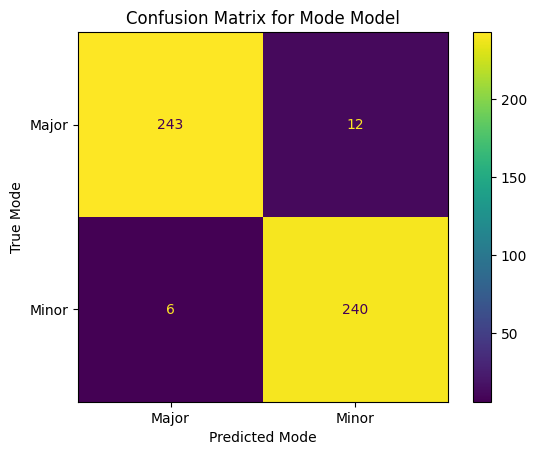

In [21]:
#@title Training the Model with GBCs (Mode)
r = random.randint(1,16777216)
print(r)
X_train_data_mode, X_test_data_mode, y_train_data_mode, y_test_data_mode = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

mode_model = sk.ensemble.GradientBoostingClassifier()
mode_model.fit(X_train_data_mode, y_train_data_mode)
predictions = mode_model.predict(X_test_data_mode)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(mode_model, X_test_data_mode, y_test_data_mode)
ds.ax_.set_title("Confusion Matrix for Mode Model")
ds.ax_.set_xlabel("Predicted Mode")
ds.ax_.set_ylabel("True Mode")
ds.ax_.xaxis.set_ticklabels(['Major', 'Minor']);
ds.ax_.yaxis.set_ticklabels(['Major', 'Minor']);
print(sk.metrics.accuracy_score(y_test_data_mode, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_mode, predictions))

10273744
0.9540918163672655
0.9542300698631447


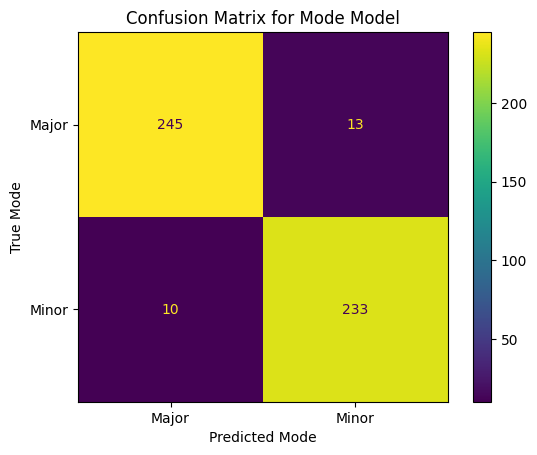

In [22]:
#@title Training the Model with SGD Classifiers (Mode)
r = random.randint(1,16777216)
print(r)
X_train_data_mode, X_test_data_mode, y_train_data_mode, y_test_data_mode = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

mode_model = sk.linear_model.SGDClassifier(alpha=7)
mode_model.fit(X_train_data_mode, y_train_data_mode)
predictions = mode_model.predict(X_test_data_mode)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(mode_model, X_test_data_mode, y_test_data_mode)
ds.ax_.set_title("Confusion Matrix for Mode Model")
ds.ax_.set_xlabel("Predicted Mode")
ds.ax_.set_ylabel("True Mode")
ds.ax_.xaxis.set_ticklabels(['Major', 'Minor']);
ds.ax_.yaxis.set_ticklabels(['Major', 'Minor']);
print(sk.metrics.accuracy_score(y_test_data_mode, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_mode, predictions))

14712172
0.9580838323353293
0.9576014536644458


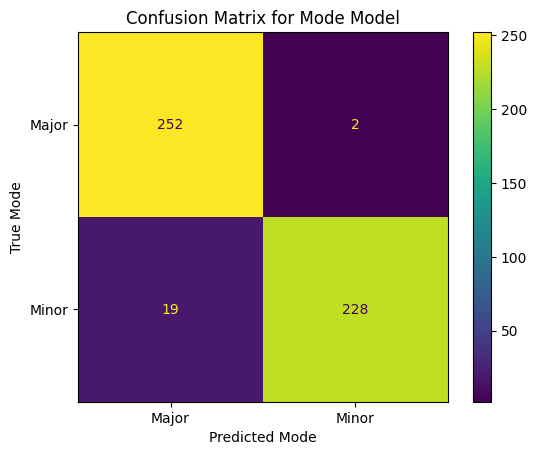

In [23]:
#@title Training the Model with Passive Aggresive Classifiers (Mode)
r = random.randint(1,16777216)
print(r)
X_train_data_mode, X_test_data_mode, y_train_data_mode, y_test_data_mode = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

mode_model = sk.linear_model.PassiveAggressiveClassifier(max_iter=10000)
mode_model.fit(X_train_data_mode, y_train_data_mode)
predictions = mode_model.predict(X_test_data_mode)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(mode_model, X_test_data_mode, y_test_data_mode)
ds.ax_.set_title("Confusion Matrix for Mode Model")
ds.ax_.set_xlabel("Predicted Mode")
ds.ax_.set_ylabel("True Mode")
ds.ax_.xaxis.set_ticklabels(['Major', 'Minor']);
ds.ax_.yaxis.set_ticklabels(['Major', 'Minor']);
print(sk.metrics.accuracy_score(y_test_data_mode, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_mode, predictions))

1 1553
1 1554
1 1555
1 1556
1 1557
1 1558
1 1559
1 1560
1 1561
1 1562
1 1563
1 1564
1 1565
1 1566
1 1567
1 1568
1 1569
1 1570
1 1571
1 1572
1 1573
1 1574
1 1575
1 1576
1 1577
1 1578
1 1579
1 1580
1 1581
1 1582
1 1583
1 1584
1 1585
1 1586
1 1587
1 1588
1 1589
1 1590
1 1591
1 1592
1 1593
1 1594
1 1595
1 1596
1 1597
1 1598
1 1599
1 1600
3 992
3 993
3 994
3 995
3 996
3 997
3 998
3 999
3 1000
3 1001
3 1002
3 1003
3 1004
3 1005
3 1006
3 1007
3 1008
3 1009
3 1010
3 1011
3 1012
3 1013
3 1014
3 1015
3 1016
3 1017
3 1018
3 1019
3 1020
3 1021
3 1022
3 1023
3 1024
3 1025
3 1026
3 1027
3 1028
3 1029
3 1030
3 1031
3 1032
3 1033
3 1034
3 1035
3 1036
3 1037
3 1038
3 1039
3 1040
3 1041
3 1042
3 1043
3 1044
3 1045
3 1046
3 1047
3 1048
3 1049
3 1050
3 1051
3 1052
3 1053
3 1054
3 1055
3 1056
3 1057
3 1058
3 1059
3 1060
3 1061
3 1062
3 1063
3 1064
3 1065
3 1066
3 1067
3 1068
3 1069
3 1070
3 1071
3 1072
3 1073
3 1074
3 1075
3 1076
3 1077
3 1078
3 1079
3 1080
3 1081
3 1082
3 1083
3 1084
3 1085
3 1086
3 1087


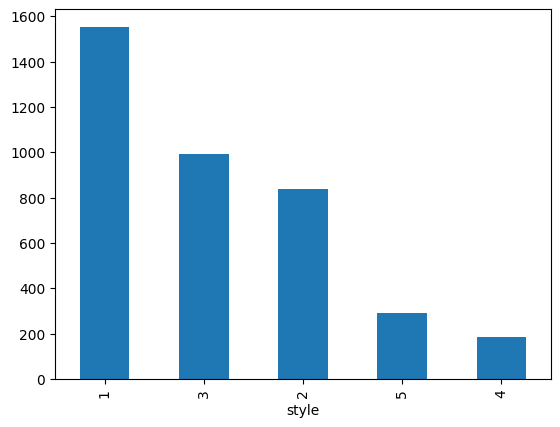

In [24]:
#@title Data Augmentation (Style)
# piece_data["style"].value_counts()

i=0
piece_data_addition=[]
shuffled_data = piece_data.sample(frac=1)
for amt in piece_data["style"].value_counts():
  current_style = piece_data["style"].value_counts().index[i]
  current_amt = amt
  while current_amt <= 1600:
    for j in range(0,len(shuffled_data)):
      current_row = shuffled_data.iloc[j]
      if current_row["style"] == current_style:
        print(current_style, current_amt)
        new_row = current_row.copy()

        keys = list(new_row.keys())
        for k in range(0,len(new_row)):
          if keys[k] != "name" and keys[k] != "path" and keys[k] != "key" and keys[k] != "mode" and keys[k] != "style":
              new_row[keys[k]] += np.random.normal(0, (0.1*new_row[keys[k]]))
        new_row["name"]=new_row["name"] + " (Augmented)"
        new_row["path"]="N/A (This piece of data was augmented)"
        piece_data_addition.append(new_row)
        current_amt+=1
      if current_amt > 1600:
        break
  i+=1

piece_data_addition = pd.DataFrame(piece_data_addition)
piece_data["style"].value_counts().plot(kind = 'bar')
piece_data_style = pd.concat([piece_data, piece_data_addition], ignore_index=True)
# piece_data_mode["style"].value_counts().plot(kind = 'bar')
# piece_data.describe()
# style_data = pd.Series(piece_data["style"]).value_counts()
# piece_data.key.value_counts().plot(kind = 'bar')
# print(piece_data.key.value_counts().index)

In [25]:
#@title Preparing Data for Style Identification
keys = piece_data_style["key"]
modes = piece_data_style["mode"]
X=[]
keys_in_order=["A", "Bb", "B", "C", "C#", "D", "Eb", "E", "F", "F#", "G", "Ab"]
for i in range(0, len(keys)):
  print(i)
  entry=[]
  for j in range(0,len(keys_in_order)):
    if modes[i] == "major":
      mode="major"
    else:
      mode="minor"
    if keys_in_order[j] == keys[i]:
      key=j
      break
  if mode == "major":
    for j in range(0,12):
      entry.append(piece_data_style["num" + keys_in_order[(key+j)%12]][i])
    for j in range(0,12):
      entry.append(piece_data_style["num" + keys_in_order[(key+j)%12]+"w"][i])
    for j in range(0,12):
      entry.append(piece_data_style["num" + keys_in_order[(key+j)%12]+"25"][i])
    for j in range(0,12):
      entry.append(piece_data_style["num" + keys_in_order[(key+j)%12]+"w25"][i])
    for j in range(0,12):
      entry.append(piece_data_style["num" + keys_in_order[(key+j)%12]+"10"][i])
    for j in range(0,12):
      entry.append(piece_data_style["num" + keys_in_order[(key+j)%12]+"w10"][i])
    for j in range(0,12):
      entry.append(piece_data_style["scale" + keys_in_order[(key+j)%12]][i])
    for j in range(0,12):
      entry.append(piece_data_style["scale" + keys_in_order[(key+j)%12]+"w"][i])
    for j in range(0,12):
      entry.append(piece_data_style["scale" + keys_in_order[(key+j)%12]+"25"][i])
    for j in range(0,12):
      entry.append(piece_data_style["scale" + keys_in_order[(key+j)%12]+"w25"][i])
    for j in range(0,12):
      entry.append(piece_data_style["scale" + keys_in_order[(key+j)%12]+"10"][i])
    for j in range(0,12):
      entry.append(piece_data_style["scale" + keys_in_order[(key+j)%12]+"w10"][i])
  if mode == "minor":
    for j in range(0,12):
      entry.append(piece_data_style["num" + keys_in_order[(key+j-3)%12]][i])
    entry[3], entry[4] = entry[4], entry[3]
    entry[8], entry[9] = entry[9], entry[8]
    entry[10], entry[11] = entry[11], entry[10]
    for j in range(0,12):
      entry.append(piece_data_style["num" + keys_in_order[(key+j-3)%12]+"w"][i])
    entry[12+3], entry[12+4] = entry[12+4], entry[12+3]
    entry[12+8], entry[12+9] = entry[12+9], entry[12+8]
    entry[12+10], entry[12+11] = entry[12+11], entry[12+10]
    for j in range(0,12):
      entry.append(piece_data_style["num" + keys_in_order[(key+j-3)%12]+"25"][i])
    entry[24+3], entry[24+4] = entry[24+4], entry[24+3]
    entry[24+8], entry[24+9] = entry[24+9], entry[24+8]
    entry[24+10], entry[24+11] = entry[24+11], entry[24+10]
    for j in range(0,12):
      entry.append(piece_data_style["num" + keys_in_order[(key+j-3)%12]+"w25"][i])
    entry[36+3], entry[36+4] = entry[36+4], entry[36+3]
    entry[36+8], entry[36+9] = entry[36+9], entry[36+8]
    entry[36+10], entry[36+11] = entry[36+11], entry[36+10]
    for j in range(0,12):
      entry.append(piece_data_style["num" + keys_in_order[(key+j-3)%12]+"10"][i])
    entry[48+3], entry[48+4] = entry[48+4], entry[48+3]
    entry[48+8], entry[48+9] = entry[48+9], entry[48+8]
    entry[48+10], entry[48+11] = entry[48+11], entry[48+10]
    for j in range(0,12):
      entry.append(piece_data_style["num" + keys_in_order[(key+j-3)%12]+"w10"][i])
    entry[60+3], entry[60+4] = entry[60+4], entry[60+3]
    entry[60+8], entry[60+9] = entry[60+9], entry[60+8]
    entry[60+10], entry[60+11] = entry[60+11], entry[60+10]
    for j in range(0,12):
      entry.append(piece_data_style["scale" + keys_in_order[(key+j-3)%12]][i])
    entry[72+3], entry[72+4] = entry[72+4], entry[72+3]
    entry[72+8], entry[72+9] = entry[72+9], entry[72+8]
    entry[72+10], entry[72+11] = entry[72+11], entry[72+10]
    for j in range(0,12):
      entry.append(piece_data_style["scale" + keys_in_order[(key+j-3)%12]+"w"][i])
    entry[84+3], entry[84+4] = entry[84+4], entry[84+3]
    entry[84+8], entry[84+9] = entry[84+9], entry[84+8]
    entry[84+10], entry[84+11] = entry[84+11], entry[84+10]
    for j in range(0,12):
      entry.append(piece_data_style["scale" + keys_in_order[(key+j-3)%12]+"25"][i])
    entry[96+3], entry[96+4] = entry[96+4], entry[96+3]
    entry[96+8], entry[96+9] = entry[96+9], entry[96+8]
    entry[96+10], entry[96+11] = entry[96+11], entry[96+10]
    for j in range(0,12):
      entry.append(piece_data_style["scale" + keys_in_order[(key+j-3)%12]+"w25"][i])
    entry[108+3], entry[108+4] = entry[108+4], entry[108+3]
    entry[108+8], entry[108+9] = entry[108+9], entry[108+8]
    entry[108+10], entry[108+11] = entry[108+11], entry[108+10]
    for j in range(0,12):
      entry.append(piece_data_style["scale" + keys_in_order[(key+j-3)%12]+"10"][i])
    entry[120+3], entry[120+4] = entry[120+4], entry[120+3]
    entry[120+8], entry[120+9] = entry[120+9], entry[120+8]
    entry[120+10], entry[120+11] = entry[120+11], entry[120+10]
    for j in range(0,12):
      entry.append(piece_data_style["scale" + keys_in_order[(key+j-3)%12]+"w10"][i])
    entry[132+3], entry[132+4] = entry[132+4], entry[132+3]
    entry[132+8], entry[132+9] = entry[132+9], entry[132+8]
    entry[132+10], entry[132+11] = entry[132+11], entry[132+10]
  entry.append(piece_data_style["binaryrhythmrate"][i] * 10)
  entry.append(piece_data_style["tripletenterrate"][i] * 10)
  entry.append(piece_data_style["tripletexitrate"][i] * 10)
  entry.append(piece_data_style["quintupletenterrate"][i] * 10)
  entry.append(piece_data_style["quintupletexitrate"][i] * 10)
  # entry[0]=entry[0]*100
  X.append(entry)

X = pd.DataFrame(X, columns=[
    "numi",
    "num#i",
    "numii",
    "numxiii",
    "numiii",
    "numiv",
    "num#iv",
    "numv",
    "numxvi",
    "numvi",
    "numxvii",
    "numvii",
    "numiw",
    "num#iw",
    "numiiw",
    "numxiiiw",
    "numiiiw",
    "numivw",
    "num#ivw",
    "numvw",
    "numxviw",
    "numviw",
    "numxviiw",
    "numviiw",
    "numi25",
    "num#i25",
    "numii25",
    "numxiii25",
    "numiii25",
    "numiv25",
    "num#iv25",
    "numv25",
    "numxvi25",
    "numvi25",
    "numxvii25",
    "numvii25",
    "numiw25",
    "num#iw25",
    "numiiw25",
    "numxiiiw25",
    "numiiiw25",
    "numivw25",
    "num#ivw25",
    "numvw25",
    "numxviw25",
    "numviw25",
    "numxviiw25",
    "numviiw25",
    "numi10",
    "num#i10",
    "numii10",
    "numxiii10",
    "numiii10",
    "numiv10",
    "num#iv10",
    "numv10",
    "numxvi10",
    "numvi10",
    "numxvii10",
    "numvii10",
    "numiw10",
    "num#iw10",
    "numiiw10",
    "numxiiiw10",
    "numiiiw10",
    "numivw10",
    "num#ivw10",
    "numvw10",
    "numxviw10",
    "numviw10",
    "numxviiw10",
    "numviiw10",
    "scalei",
    "scale#i",
    "scaleii",
    "scalexiii",
    "scaleiii",
    "scaleiv",
    "scale#iv",
    "scalev",
    "scalexvi",
    "scalevi",
    "scalexvii",
    "scalevii",
    "scaleiw",
    "scale#iw",
    "scaleiiw",
    "scalexiiiw",
    "scaleiiiw",
    "scaleivw",
    "scale#ivw",
    "scalevw",
    "scalexviw",
    "scaleviw",
    "scalexviiw",
    "scaleviiw",
    "scalei25",
    "scale#i25",
    "scaleii25",
    "scalexiii25",
    "scaleiii25",
    "scaleiv25",
    "scale#iv25",
    "scalev25",
    "scalexvi25",
    "scalevi25",
    "scalexvii25",
    "scalevii25",
    "scaleiw25",
    "scale#iw25",
    "scaleiiw25",
    "scalexiiiw25",
    "scaleiiiw25",
    "scaleivw25",
    "scale#ivw25",
    "scalevw25",
    "scalexviw25",
    "scaleviw25",
    "scalexviiw25",
    "scaleviiw25",
    "scalei10",
    "scale#i10",
    "scaleii10",
    "scalexiii10",
    "scaleiii10",
    "scaleiv10",
    "scale#iv10",
    "scalev10",
    "scalexvi10",
    "scalevi10",
    "scalexvii10",
    "scalevii10",
    "scaleiw10",
    "scale#iw10",
    "scaleiiw10",
    "scalexiiiw10",
    "scaleiiiw10",
    "scaleivw10",
    "scale#ivw10",
    "scalevw10",
    "scalexviw10",
    "scaleviw10",
    "scalexviiw10",
    "scaleviiw10",
    "brate",
    "terate",
    "txrate",
    "qerate",
    "qxrate",
])
y = piece_data_style["style"]

# index = np.array([9, 10, 11, 1, 0, 2, 3, 4, 6, 5, 8, 7,
#                 21, 22, 23, 13, 12, 14, 15, 16, 18, 17, 20, 19,
#                 33, 34, 35, 25, 24, 26, 27, 28, 30, 29, 32, 31,
#                 45, 46, 47, 37, 36, 38, 39, 40, 42, 41, 44, 43,
#                 57, 58, 59, 49, 48, 50, 51, 52, 54, 53, 56, 55,
#                 69, 70, 71, 61, 60, 62, 63, 64, 66, 65, 68, 67,
#                 81, 82, 83, 73, 72, 74, 75, 76, 78, 77, 80, 79,
#                 93, 94, 95, 85, 84, 86, 87, 88, 90, 89, 92, 91,
#                 105, 106, 107, 97, 96, 98, 99, 100, 102, 101, 104, 103,
#                 117, 118, 119, 109, 108, 110, 111, 112, 114, 113, 116, 115,
#                 129, 130, 131, 121, 120, 122, 123, 124, 126, 125, 128, 127,
#                 141, 142, 143, 133, 132, 134, 135, 136, 138, 137, 140, 139,
#                 ])

for i in range(0,len(X)):
  if len(X.loc[i]) != 149:
    print(i)


print("Shape:", X.shape)
print("Shape:", y.shape)
X.describe()
y.value_counts()

Streaming output truncated to the last 5000 lines.
3007
3008
3009
3010
3011
3012
3013
3014
3015
3016
3017
3018
3019
3020
3021
3022
3023
3024
3025
3026
3027
3028
3029
3030
3031
3032
3033
3034
3035
3036
3037
3038
3039
3040
3041
3042
3043
3044
3045
3046
3047
3048
3049
3050
3051
3052
3053
3054
3055
3056
3057
3058
3059
3060
3061
3062
3063
3064
3065
3066
3067
3068
3069
3070
3071
3072
3073
3074
3075
3076
3077
3078
3079
3080
3081
3082
3083
3084
3085
3086
3087
3088
3089
3090
3091
3092
3093
3094
3095
3096
3097
3098
3099
3100
3101
3102
3103
3104
3105
3106
3107
3108
3109
3110
3111
3112
3113
3114
3115
3116
3117
3118
3119
3120
3121
3122
3123
3124
3125
3126
3127
3128
3129
3130
3131
3132
3133
3134
3135
3136
3137
3138
3139
3140
3141
3142
3143
3144
3145
3146
3147
3148
3149
3150
3151
3152
3153
3154
3155
3156
3157
3158
3159
3160
3161
3162
3163
3164
3165
3166
3167
3168
3169
3170
3171
3172
3173
3174
3175
3176
3177
3178
3179
3180
3181
3182
3183
3184
3185
3186
3187
3188
3189
3190
3191
3192
3193
3194
3195
3196

,count
style,
1,1601
3,1601
5,1601
2,1601
4,1601


4234902


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.4394506866416979
0.43517574797398123


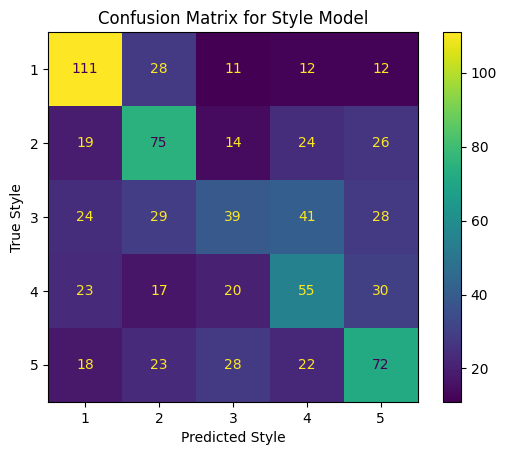

In [26]:
#@title Training the Model with Logistic Regression Classifiers (Style)
r = random.randint(1,16777216)
print(r)
X_train_data_style, X_test_data_style, y_train_data_style, y_test_data_style = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

style_model = sk.linear_model.LogisticRegression(penalty='l2',
                                           dual=False,
                                           tol=0.0001,
                                           C=1,
                                           fit_intercept=True,
                                           intercept_scaling=1,
                                           class_weight=None,
                                           random_state=None,
                                           solver='lbfgs',
                                           max_iter=100,
                                           verbose=1,
                                           warm_start=True,
                                           n_jobs=None,
                                           l1_ratio=None
                                           )
style_model.fit(X_train_data_style, y_train_data_style)
predictions = style_model.predict(X_test_data_style)
# sk.metrics.confusion_matrix(y_test_data_style, predictions)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(style_model, X_test_data_style, y_test_data_style)
ds.ax_.set_title("Confusion Matrix for Style Model")
ds.ax_.set_xlabel("Predicted Style")
ds.ax_.set_ylabel("True Style")
print(sk.metrics.accuracy_score(y_test_data_style, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_style, predictions))

4971353
0.3445692883895131
0.34423602204247367


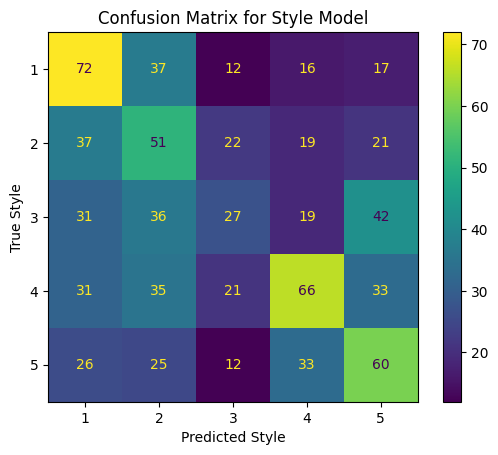

In [27]:
#@title Training the Model with Bernoulli Naive Bayes Classifiers (Style)
r = random.randint(1,16777216)
print(r)
X_train_data_style, X_test_data_style, y_train_data_style, y_test_data_style = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

style_model = sk.naive_bayes.BernoulliNB(binarize=20)
style_model.fit(X_train_data_style, y_train_data_style)
predictions = style_model.predict(X_test_data_style)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(style_model, X_test_data_style, y_test_data_style)
ds.ax_.set_title("Confusion Matrix for Style Model")
ds.ax_.set_xlabel("Predicted Style")
ds.ax_.set_ylabel("True Style")
print(sk.metrics.accuracy_score(y_test_data_style, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_style, predictions))

4001455
0.6142322097378277
0.6170001149971869


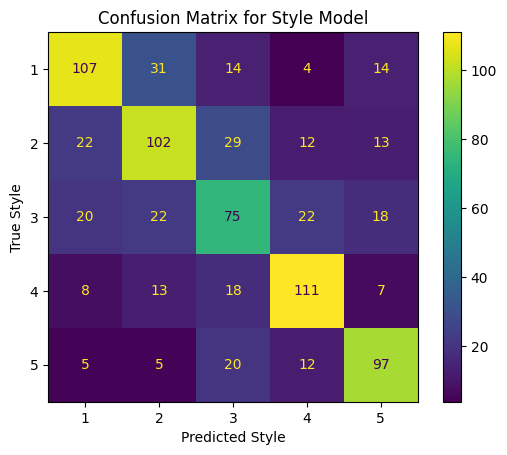

In [28]:
#@title Training the Model with Decision Tree Classifiers (Style)
r = random.randint(1,16777216)
print(r)
X_train_data_style, X_test_data_style, y_train_data_style, y_test_data_style = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

style_model = sk.tree.DecisionTreeClassifier()
style_model.fit(X_train_data_style, y_train_data_style)
predictions = style_model.predict(X_test_data_style)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(style_model, X_test_data_style, y_test_data_style)
ds.ax_.set_title("Confusion Matrix for Style Model")
ds.ax_.set_xlabel("Predicted Style")
ds.ax_.set_ylabel("True Style")
print(sk.metrics.accuracy_score(y_test_data_style, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_style, predictions))

5146474
0.5655430711610487
0.5702987387016425


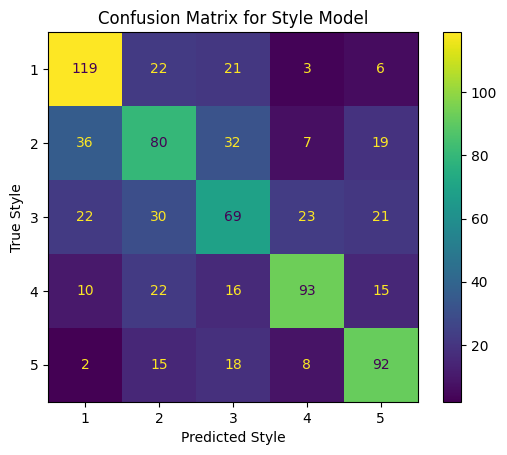

In [29]:
#@title Training the Model with Extra Trees Classifiers (Style)
r = random.randint(1,16777216)
print(r)
X_train_data_style, X_test_data_style, y_train_data_style, y_test_data_style = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

style_model = sk.tree.ExtraTreeClassifier()
style_model.fit(X_train_data_style, y_train_data_style)
predictions = style_model.predict(X_test_data_style)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(style_model, X_test_data_style, y_test_data_style)
ds.ax_.set_title("Confusion Matrix for Style Model")
ds.ax_.set_xlabel("Predicted Style")
ds.ax_.set_ylabel("True Style")
print(sk.metrics.accuracy_score(y_test_data_style, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_style, predictions))

6704431
0.3945068664169788
0.398107405482034


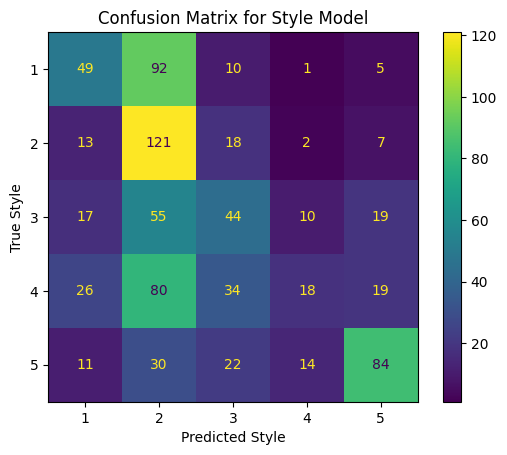

In [30]:
#@title Training the Model with Gaussian Naive Bayes Classifiers (Style)
r = random.randint(1,16777216)
print(r)
X_train_data_style, X_test_data_style, y_train_data_style, y_test_data_style = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

style_model = sk.naive_bayes.GaussianNB()
style_model.fit(X_train_data_style, y_train_data_style)
predictions = style_model.predict(X_test_data_style)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(style_model, X_test_data_style, y_test_data_style)
ds.ax_.set_title("Confusion Matrix for Style Model")
ds.ax_.set_xlabel("Predicted Style")
ds.ax_.set_ylabel("True Style")
print(sk.metrics.accuracy_score(y_test_data_style, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_style, predictions))

460374
0.6666666666666666
0.6754216925015285


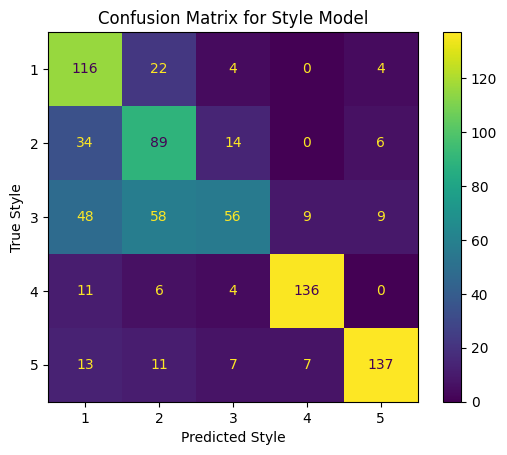

In [31]:
#@title Training the Model with KNN Classifiers (Style)
r = random.randint(1,16777216)
print(r)
X_train_data_style, X_test_data_style, y_train_data_style, y_test_data_style = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

style_model = sk.neighbors.KNeighborsClassifier()
style_model.fit(X_train_data_style, y_train_data_style)
predictions = style_model.predict(X_test_data_style)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(style_model, X_test_data_style, y_test_data_style)
ds.ax_.set_title("Confusion Matrix for Style Model")
ds.ax_.set_xlabel("Predicted Style")
ds.ax_.set_ylabel("True Style")
print(sk.metrics.accuracy_score(y_test_data_style, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_style, predictions))

5910057
0.4893882646691635
0.4906210666673346


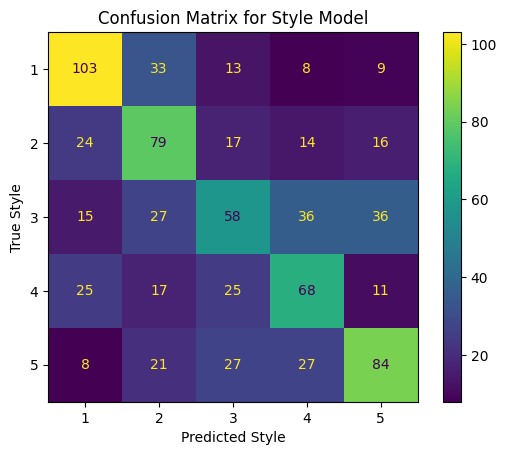

In [32]:
#@title Training the Model with Linear Discriminant Analysis Classifiers (Style)
r = random.randint(1,16777216)
print(r)
X_train_data_style, X_test_data_style, y_train_data_style, y_test_data_style = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

style_model = sk.discriminant_analysis.LinearDiscriminantAnalysis()
style_model.fit(X_train_data_style, y_train_data_style)
predictions = style_model.predict(X_test_data_style)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(style_model, X_test_data_style, y_test_data_style)
ds.ax_.set_title("Confusion Matrix for Style Model")
ds.ax_.set_xlabel("Predicted Style")
ds.ax_.set_ylabel("True Style")
print(sk.metrics.accuracy_score(y_test_data_style, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_style, predictions))

7227566
0.45942571785268416
0.4631030272613662


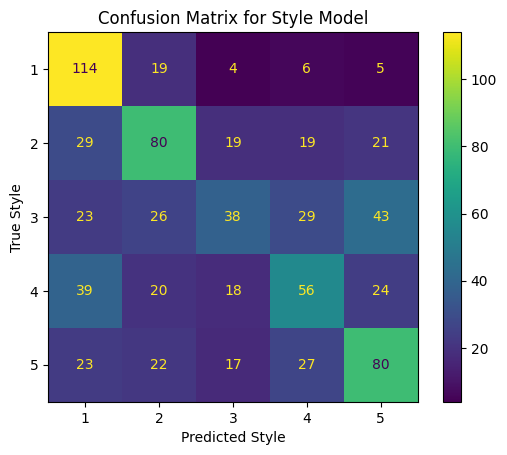

In [33]:
#@title Training the Model with Linear SVCs (Style)
r = random.randint(1,16777216)
print(r)
X_train_data_style, X_test_data_style, y_train_data_style, y_test_data_style = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

style_model = sk.svm.LinearSVC()
style_model.fit(X_train_data_style, y_train_data_style)
predictions = style_model.predict(X_test_data_style)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(style_model, X_test_data_style, y_test_data_style)
ds.ax_.set_title("Confusion Matrix for Style Model")
ds.ax_.set_xlabel("Predicted Style")
ds.ax_.set_ylabel("True Style")
print(sk.metrics.accuracy_score(y_test_data_style, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_style, predictions))

288773


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.4606741573033708
0.4600000784772017


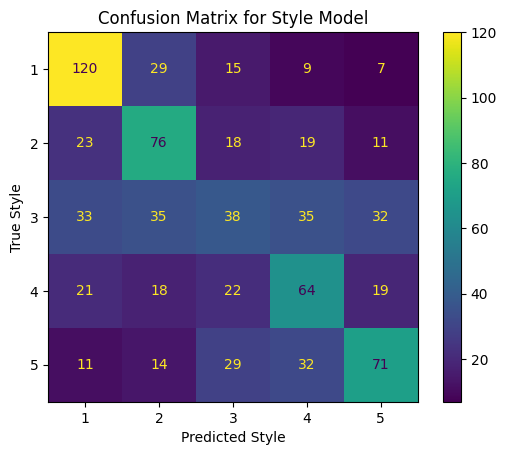

In [34]:
#@title Training the Model with MLP Classifiers (Style)
r = random.randint(1,16777216)
print(r)
X_train_data_style, X_test_data_style, y_train_data_style, y_test_data_style = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

style_model = sk.neural_network.MLPClassifier(solver='lbfgs')
style_model.fit(X_train_data_style, y_train_data_style)
predictions = style_model.predict(X_test_data_style)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(style_model, X_test_data_style, y_test_data_style)
ds.ax_.set_title("Confusion Matrix for Style Model")
ds.ax_.set_xlabel("Predicted Style")
ds.ax_.set_ylabel("True Style")
print(sk.metrics.accuracy_score(y_test_data_style, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_style, predictions))

8183295
0.36329588014981273
0.3656280021348514


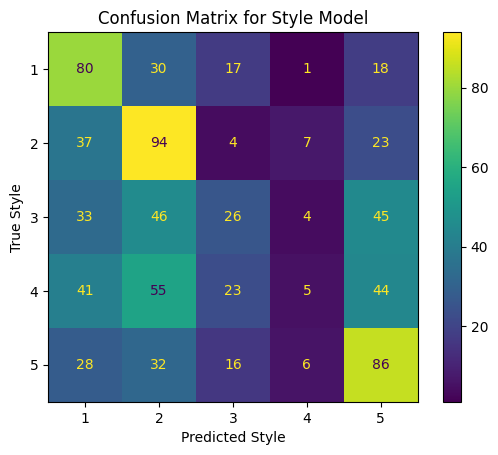

In [35]:
#@title Training the Model with Nearest Centroid Classifiers (Style)
r = random.randint(1,16777216)
print(r)
X_train_data_style, X_test_data_style, y_train_data_style, y_test_data_style = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

style_model = sk.neighbors.NearestCentroid(metric='manhattan')
style_model.fit(X_train_data_style, y_train_data_style)
predictions = style_model.predict(X_test_data_style)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(style_model, X_test_data_style, y_test_data_style)
ds.ax_.set_title("Confusion Matrix for Style Model")
ds.ax_.set_xlabel("Predicted Style")
ds.ax_.set_ylabel("True Style")
print(sk.metrics.accuracy_score(y_test_data_style, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_style, predictions))

15136527
0.6117353308364545
0.6060959191926614


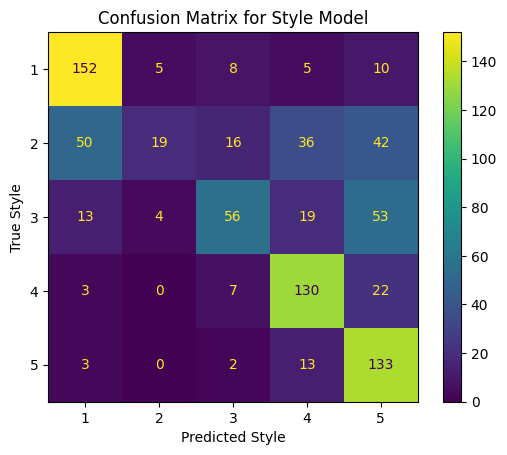

In [36]:
#@title Training the Model with Quadratic Discriminant Analysis Classifiers (Style)
r = random.randint(1,16777216)
print(r)
X_train_data_style, X_test_data_style, y_train_data_style, y_test_data_style = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

style_model = sk.discriminant_analysis.QuadraticDiscriminantAnalysis(reg_param=0.75)
style_model.fit(X_train_data_style, y_train_data_style)
predictions = style_model.predict(X_test_data_style)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(style_model, X_test_data_style, y_test_data_style)
ds.ax_.set_title("Confusion Matrix for Style Model")
ds.ax_.set_xlabel("Predicted Style")
ds.ax_.set_ylabel("True Style")
print(sk.metrics.accuracy_score(y_test_data_style, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_style, predictions))

11942570
0.6978776529338327
0.7028057840937718


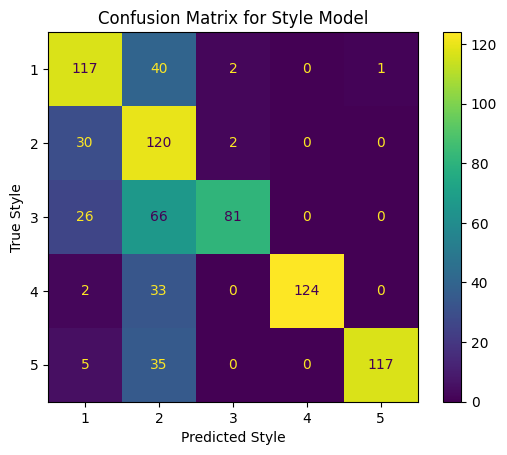

In [37]:
#@title Training the Model with Radius Neighbors Classifiers (Style)
r = random.randint(1,16777216)
print(r)
X_train_data_style, X_test_data_style, y_train_data_style, y_test_data_style = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

style_model = sk.neighbors.RadiusNeighborsClassifier(radius=75, outlier_label='most_frequent')
style_model.fit(X_train_data_style, y_train_data_style)
predictions = style_model.predict(X_test_data_style)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(style_model, X_test_data_style, y_test_data_style)
ds.ax_.set_title("Confusion Matrix for Style Model")
ds.ax_.set_xlabel("Predicted Style")
ds.ax_.set_ylabel("True Style")
print(sk.metrics.accuracy_score(y_test_data_style, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_style, predictions))

8974762
0.8776529338327091
0.8775375249568798


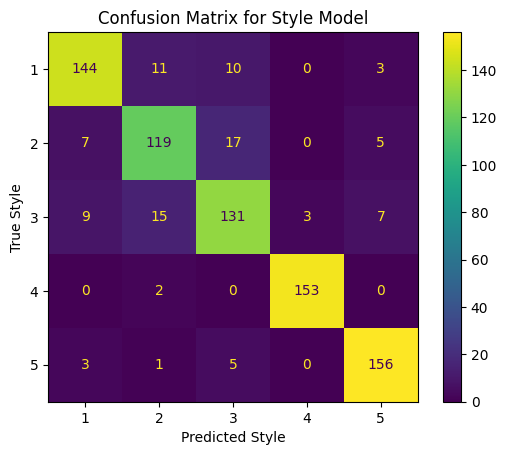

In [38]:
#@title Training the Model with Random Forest Classifiers (Style)
r = random.randint(1,16777216)
print(r)
X_train_data_style, X_test_data_style, y_train_data_style, y_test_data_style = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

style_model = sk.ensemble.RandomForestClassifier()
style_model.fit(X_train_data_style, y_train_data_style)
predictions = style_model.predict(X_test_data_style)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(style_model, X_test_data_style, y_test_data_style)
ds.ax_.set_title("Confusion Matrix for Style Model")
ds.ax_.set_xlabel("Predicted Style")
ds.ax_.set_ylabel("True Style")
print(sk.metrics.accuracy_score(y_test_data_style, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_style, predictions))

6051979
0.4818976279650437
0.48063234919140907


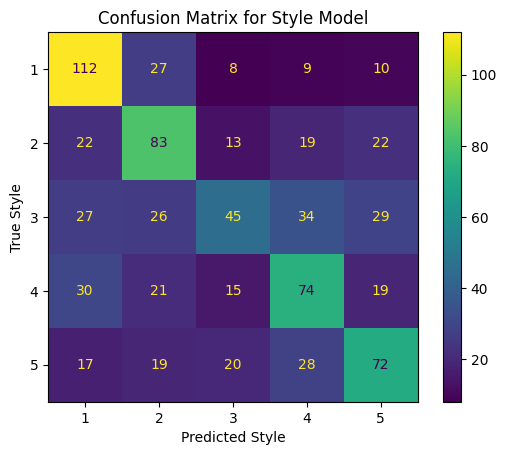

In [39]:
#@title Training the Model with Ridge Classifiers (Style)
r = random.randint(1,16777216)
print(r)
X_train_data_style, X_test_data_style, y_train_data_style, y_test_data_style = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

style_model = sk.linear_model.RidgeClassifier()
style_model.fit(X_train_data_style, y_train_data_style)
predictions = style_model.predict(X_test_data_style)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(style_model, X_test_data_style, y_test_data_style)
ds.ax_.set_title("Confusion Matrix for Style Model")
ds.ax_.set_xlabel("Predicted Style")
ds.ax_.set_ylabel("True Style")
print(sk.metrics.accuracy_score(y_test_data_style, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_style, predictions))

11612048
0.7253433208489388
0.7238710439022087


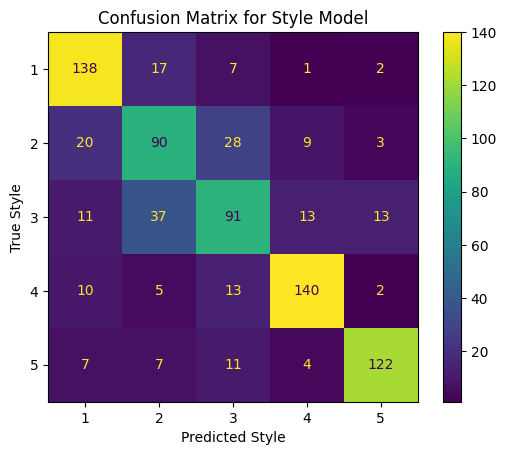

In [40]:
#@title Training the Model with Nu-SVCs (Style)
r = random.randint(1,16777216)
print(r)
X_train_data_style, X_test_data_style, y_train_data_style, y_test_data_style = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

style_model = sk.svm.NuSVC(nu=0.15)
style_model.fit(X_train_data_style, y_train_data_style)
predictions = style_model.predict(X_test_data_style)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(style_model, X_test_data_style, y_test_data_style)
ds.ax_.set_title("Confusion Matrix for Style Model")
ds.ax_.set_xlabel("Predicted Style")
ds.ax_.set_ylabel("True Style")
print(sk.metrics.accuracy_score(y_test_data_style, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_style, predictions))

16452142
0.7553058676654182
0.7543152007003217


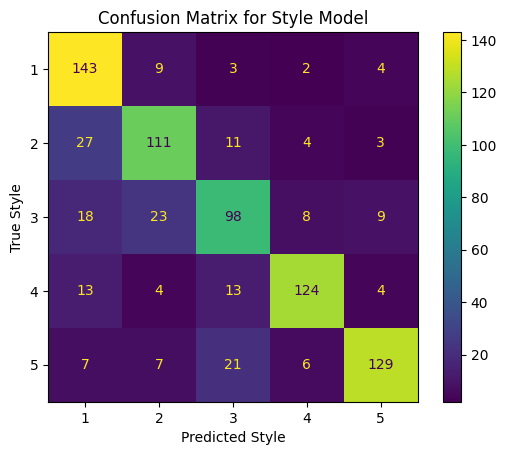

In [41]:
#@title Training the Model with SVCs (Style)
r = random.randint(1,16777216)
print(r)
X_train_data_style, X_test_data_style, y_train_data_style, y_test_data_style = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

style_model = sk.svm.SVC(C=1000)
style_model.fit(X_train_data_style, y_train_data_style)
predictions = style_model.predict(X_test_data_style)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(style_model, X_test_data_style, y_test_data_style)
ds.ax_.set_title("Confusion Matrix for Style Model")
ds.ax_.set_xlabel("Predicted Style")
ds.ax_.set_ylabel("True Style")
print(sk.metrics.accuracy_score(y_test_data_style, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_style, predictions))

10114897
0.7166042446941323
0.7142233567484644


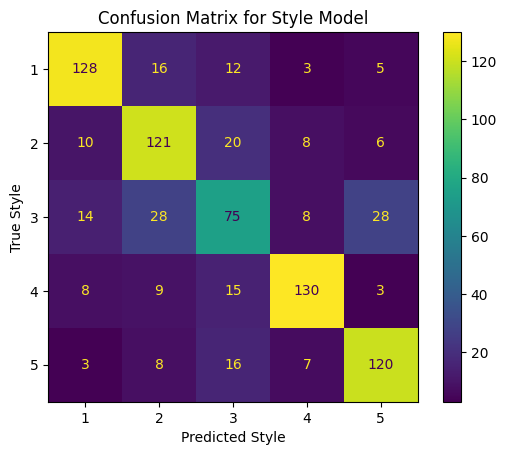

In [42]:
#@title Training the Model with GBCs (Style)
r = random.randint(1,16777216)
print(r)
X_train_data_style, X_test_data_style, y_train_data_style, y_test_data_style = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

style_model = sk.ensemble.GradientBoostingClassifier()
style_model.fit(X_train_data_style, y_train_data_style)
predictions = style_model.predict(X_test_data_style)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(style_model, X_test_data_style, y_test_data_style)
ds.ax_.set_title("Confusion Matrix for Style Model")
ds.ax_.set_xlabel("Predicted Style")
ds.ax_.set_ylabel("True Style")
print(sk.metrics.accuracy_score(y_test_data_style, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_style, predictions))

15556001
0.4631710362047441
0.4619710361980047


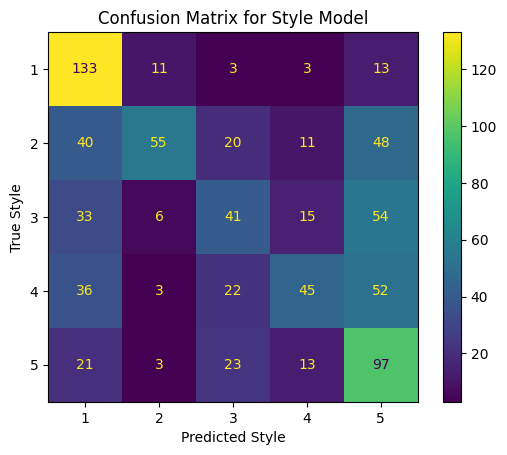

In [43]:
#@title Training the Model with SGD Classifiers (Style)
r = random.randint(1,16777216)
print(r)
X_train_data_style, X_test_data_style, y_train_data_style, y_test_data_style = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

style_model = sk.linear_model.SGDClassifier(alpha=14)
style_model.fit(X_train_data_style, y_train_data_style)
predictions = style_model.predict(X_test_data_style)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(style_model, X_test_data_style, y_test_data_style)
ds.ax_.set_title("Confusion Matrix for Style Model")
ds.ax_.set_xlabel("Predicted Style")
ds.ax_.set_ylabel("True Style")
print(sk.metrics.accuracy_score(y_test_data_style, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_style, predictions))

6198639
0.3995006242197253
0.39255110834445706


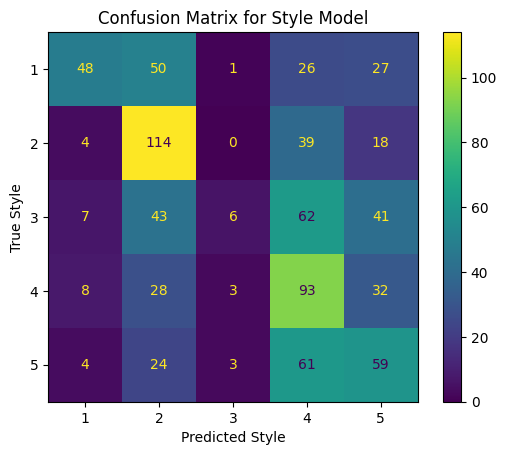

In [44]:
#@title Training the Model with Passive Aggresive Classifiers (Style)
r = random.randint(1,16777216)
print(r)
X_train_data_style, X_test_data_style, y_train_data_style, y_test_data_style = sk.model_selection.train_test_split(X,y,test_size=0.1, random_state = r)

style_model = sk.linear_model.PassiveAggressiveClassifier(max_iter=10000)
style_model.fit(X_train_data_style, y_train_data_style)
predictions = style_model.predict(X_test_data_style)
ds = sk.metrics.ConfusionMatrixDisplay.from_estimator(style_model, X_test_data_style, y_test_data_style)
ds.ax_.set_title("Confusion Matrix for Style Model")
ds.ax_.set_xlabel("Predicted Style")
ds.ax_.set_ylabel("True Style")
print(sk.metrics.accuracy_score(y_test_data_style, predictions))
print(sk.metrics.balanced_accuracy_score(y_test_data_style, predictions))

In [45]:
pickle.dump(key_model, open('key_model.pkl', 'wb'))
pickle.dump(mode_model, open('mode_model.pkl', 'wb'))
pickle.dump(style_model, open('style_model.pkl', 'wb'))

NameError: name 'key_model' is not defined